# **Introducción**

## • **Descripción breve del objetivo del proyecto.**
El objetivo principal de este proyecto es analizar los patrones de comportamiento y experiencia de los pasajeros de una aerolínea para determinar qué factores influyen mayormente en su nivel de satisfacción. A través de técnicas de ciencia de datos, se busca construir un modelo o realizar un análisis exploratorio exhaustivo que permita identificar las variables críticas (como retrasos, comodidad o servicios a bordo) que diferencian a un cliente satisfecho de uno insatisfecho o neutral.

## • **Justificación y contexto**

En la industria aeronáutica, la competencia es agresiva y la lealtad del cliente es volátil. Entender qué hace feliz a un pasajero no es solo una cuestión de calidad, sino de rentabilidad.

La importancia de resolver esta problemática radica en tres puntos clave detectados en el análisis preliminar:

1. Retención de Clientes (Churn): Un cliente insatisfecho es un cliente que probablemente elegirá otra aerolínea en su próximo viaje. Predecir la insatisfacción permite actuar proactivamente antes de perder al usuario.

2. Optimización de Inversiones: A menudo las aerolíneas invierten millones en reducir retrasos operativos. Sin embargo, nuestro análisis sugiere que la experiencia digital (App, Wifi, Abordaje) tiene un impacto mucho mayor en la percepción del cliente. Este modelo ayudará a validar dónde es más rentable invertir.

3. Detección de "Falsos Positivos" en el Servicio: Identificar que los retrasos moderados no son la causa principal de las quejas permite a la aerolínea enfocar sus recursos en mejorar la experiencia a bordo (Confort y Entretenimiento) para mitigar los inconvenientes operativos inevitables.

## • **Fuentes de Datos**

Origen: Los datos provienen de encuestas de satisfacción de pasajeros de aerolíneas, una estructura estándar utilizada frecuentemente en análisis de calidad de servicio en la industria.

Cantidad de Datos: El dataset original consta de 98,665 registros (filas) y 24 variables (columnas). Esto representa un volumen de datos robusto, suficiente para entrenar modelos complejos sin riesgo alto de sobreajuste.

**Principales Características:**

1. Variable Objetivo: Satisfaccion (Categórica: Insatisfecho, Neutral, Satisfecho).

2. Variables de Servicio: 14 columnas con calificaciones en escala del 1 al 5 (ej. Servicio de Wifi, Comodidad de Asiento, Limpieza).

3. Variables Demográficas y de Vuelo: Incluye Genero, Edad, Tipo de Cliente (Lealtad), Tipo de Viaje (Negocios/Personal), Clase y Distancia de Vuelo.

4. Variables Operativas: Retraso de Salida y Retraso de Llegada (en minutos).

# **Metodología**

#### **Proceso de limpieza de datos**

Para este proyecto, la limpieza se llevó a cabo con una metodología clara. El objetivo era conservar la mayor cantidad de información posible, con lo anterior, el proceso de limpiar los datos se hizo conforme a los requerimientos, no se busca eliminar datos, ya que sería pérdida de información. Para los valores nulos, lo que se realizó fue reemplazarlos por valores que ya existian en la base de datos. Por ejemplo, si se trataba de un dato categórico, se reemplazó por la moda, y para los datos numéricos, habia dos opciones, si la distribución de los datos era normal, los nulos se reemplazaron por la media. Por otro lado, si la distribución era sesgada o bimodal, se reemplazó por la mediana, o en su defecto, por la moda.

Para los duplicados, la metodología fue eliminar los registros que fueran exactamente iguales, ya que, no aportan nada a la información del dataset, además todos son diferentes registros.

Para los valores atípicos, no se eliminaron por completo, pero un punto muy importante a tomar en cuenta es que, si los valores extremos (Outliers), distorsionaban la media de los datos, entonces no se tomaría de primera instancia como referencia.

# **Análisis Exploratorio de Datos**

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('df_limpio.csv')
df

C:\Users\Federico Camacho\AppData\Local\Temp\ipykernel_15632\2235415644.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('df_limpio.csv')


,id,Genero,Tipo de Cliente,Edad,Tipo de Viaje,Clase,Distancia de Vuelo,Servicio de Wifi,Tiempo de Llegada/Salida Conveniente,Facilidad de Reservacion en Linea,...,Entretenimiento en Vuelo,Servicio en Mesa,Espacio del Asiento,Servicio de Equipaje,Servicio de Checkin,Servicio de Vuelo,Limpieza,Retraso de Salida,Retraso de Llegada,Satisfaccion
0,70172.0,Masculino,Cliente Leal,13,Viaje Personal,Sin Clase,460,3,4,3,...,5,4,3,4,4,5,5,25,18,Insatisfecho
1,5047.0,Masculino,Cliente Desleal,25,Viaje de Negocios,Ejecutiva,235,3,2,3,...,1,1,5,3,1,4,1,1,6,Insatisfecho
2,110028.0,Femenino,Sin Cliente Especifico,26,Viaje de Negocios,Ejecutiva,1142,2,2,2,...,5,4,3,4,4,4,5,0,0,neutral
3,24026.0,Femenino,Cliente Leal,39,Viaje de Negocios,Ejecutiva,562,2,5,5,...,2,2,5,3,1,4,2,11,9,Insatisfecho
4,119299.0,Masculino,Cliente Leal,61,Viaje de Negocios,Ejecutiva,214,3,3,3,...,3,3,4,4,3,3,3,0,1,Satisfecho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98660,15853.0,Femenino,Cliente Leal,39,Viaje de Negocios,Ejecutiva,2536,5,1,5,...,1,5,3,1,5,2,5,271,243,Satisfecho
98661,83437.0,Femenino,Cliente Desleal,23,Viaje de Negocios,Económica,632,3,0,3,...,2,3,3,5,5,3,2,0,1,Insatisfecho
98662,104401.0,Masculino,Cliente Leal,60,Viaje de Negocios,Ejecutiva,3545,5,4,5,...,4,4,4,4,4,3,3,3,0,Satisfecho
98663,114393.0,Femenino,Cliente Leal,44,Viaje de Negocios,Ejecutiva,3534,2,2,2,...,5,5,5,5,5,5,5,0,0,Satisfecho


In [4]:
df.columns

Index(['id', 'Genero', 'Tipo de Cliente', 'Edad', 'Tipo de Viaje', 'Clase',
       'Distancia de Vuelo', 'Servicio de Wifi',
       'Tiempo de Llegada/Salida Conveniente',
       'Facilidad de Reservacion en Linea', 'Ubicacion de Puerta',
       'Comida y Bebida', 'Abordaje en Linea', 'Comodidad de Asiento',
       'Entretenimiento en Vuelo', 'Servicio en Mesa', 'Espacio del Asiento',
       'Servicio de Equipaje', 'Servicio de Checkin', 'Servicio de Vuelo',
       'Limpieza', 'Retraso de Salida', 'Retraso de Llegada', 'Satisfaccion'],
      dtype='object')

# **1. Descripción General de los Datos**

### **• Visión general:**

In [5]:
df.shape

(98665, 24)

“El dataset contiene 98665 registros y 24 variables.” 

### **• Tipos de Variables:**

In [6]:
df.dtypes

id                                      object
Genero                                  object
Tipo de Cliente                         object
Edad                                     int64
Tipo de Viaje                           object
Clase                                   object
Distancia de Vuelo                       int64
Servicio de Wifi                         int64
Tiempo de Llegada/Salida Conveniente     int64
Facilidad de Reservacion en Linea        int64
Ubicacion de Puerta                      int64
Comida y Bebida                          int64
Abordaje en Linea                        int64
Comodidad de Asiento                     int64
Entretenimiento en Vuelo                 int64
Servicio en Mesa                         int64
Espacio del Asiento                      int64
Servicio de Equipaje                     int64
Servicio de Checkin                      int64
Servicio de Vuelo                        int64
Limpieza                                 int64
Retraso de Sa

In [7]:
#Ciclo for para identificar el tipo de variables que se presentan
col = df.columns
for i in col:
    
    if pd.api.types.is_bool_dtype(df[i]):
        tipo = "Booleana"
    elif pd.api.types.is_numeric_dtype(df[i]):
        tipo = "Numérica"
    else:
        tipo = "Categórica"
        
    print(f"La variable {i} es {tipo}")

La variable id es Categórica
La variable Genero es Categórica
La variable Tipo de Cliente es Categórica
La variable Edad es Numérica
La variable Tipo de Viaje es Categórica
La variable Clase es Categórica
La variable Distancia de Vuelo es Numérica
La variable Servicio de Wifi es Numérica
La variable Tiempo de Llegada/Salida Conveniente es Numérica
La variable Facilidad de Reservacion en Linea es Numérica
La variable Ubicacion de Puerta es Numérica
La variable Comida y Bebida es Numérica
La variable Abordaje en Linea es Numérica
La variable Comodidad de Asiento es Numérica
La variable Entretenimiento en Vuelo es Numérica
La variable Servicio en Mesa es Numérica
La variable Espacio del Asiento es Numérica
La variable Servicio de Equipaje es Numérica
La variable Servicio de Checkin es Numérica
La variable Servicio de Vuelo es Numérica
La variable Limpieza es Numérica
La variable Retraso de Salida es Numérica
La variable Retraso de Llegada es Numérica
La variable Satisfaccion es Categórica

### **• Resumen estadístico:**

• Variables numéricas

In [8]:
df.describe()

,Edad,Distancia de Vuelo,Servicio de Wifi,Tiempo de Llegada/Salida Conveniente,Facilidad de Reservacion en Linea,Ubicacion de Puerta,Comida y Bebida,Abordaje en Linea,Comodidad de Asiento,Entretenimiento en Vuelo,Servicio en Mesa,Espacio del Asiento,Servicio de Equipaje,Servicio de Checkin,Servicio de Vuelo,Limpieza,Retraso de Salida,Retraso de Llegada
count,98665.000000,98665.000000,98665.000000,98665.000000,98665.000000,98665.000000,98665.000000,98665.000000,98665.000000,98665.000000,98665.000000,98665.000000,98665.000000,98665.000000,98665.000000,98665.000000,98665.000000,98665.000000
mean,39.389794,1176.493336,2.738286,3.096610,2.766310,2.978665,3.251163,3.295140,3.460285,3.396199,3.420848,3.337455,3.673674,3.290934,3.615152,3.274535,14.752394,14.251781
std,14.666554,980.357092,1.302336,1.505864,1.371192,1.252687,1.302573,1.320335,1.297958,1.302115,1.257509,1.290380,1.162862,1.241625,1.158364,1.286814,37.281616,37.307476
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,427.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,39.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,50.000000,1699.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,14.000000,11.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


• Variables categóricas:

In [9]:
df['id'].value_counts()

id
70172.0     1
5047.0      1
110028.0    1
24026.0     1
119299.0    1
           ..
15853.0     1
83437.0     1
104401.0    1
114393.0    1
55896.0     1
Name: count, Length: 98665, dtype: int64

In [10]:
df['Genero'].value_counts()

Genero
Femenino      47023
Masculino     45746
Sin Género     5896
Name: count, dtype: int64

In [11]:
df['Tipo de Cliente'].value_counts()

Tipo de Cliente
Cliente Leal              77456
Cliente Desleal           17273
Sin Cliente Especifico     3936
Name: count, dtype: int64

In [12]:
df['Tipo de Viaje'].value_counts()

Tipo de Viaje
Viaje de Negocios    63904
Viaje Personal       28883
Sin Viaje             5878
Name: count, dtype: int64

In [13]:
df['Clase'].value_counts()

Clase
Ejecutiva         44331
Económica         41759
Económica Plus     6713
Sin Clase          5862
Name: count, dtype: int64

In [14]:
df['Satisfaccion'].value_counts()

Satisfaccion
Insatisfecho    52529
Satisfecho      40263
neutral          5873
Name: count, dtype: int64

# **2. Visualización y Distribución de Variables Individuales**

## **•Variables Numéricas**

**• Columna Edad**

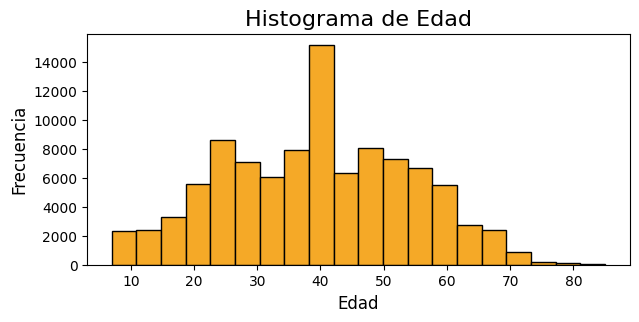

In [15]:
#Histograma de la columna 'Edad'
plt.figure(figsize=(7, 3)) 
plt.hist(df['Edad'], bins=20, color="#F5A927", edgecolor='black');  
#Personalizar
plt.title('Histograma de Edad', fontsize=16)
plt.xlabel('Edad', fontsize=12)  
plt.ylabel('Frecuencia', fontsize=12)  

plt.show()

El histograma de ‘Edad’ muestra una distribución normal, 
indicando que la mayoría de los clientes tienen al rededor de 39 a 40 años

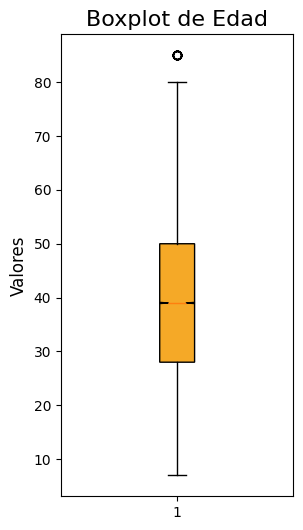

In [16]:
# Crear el boxplot
plt.figure(figsize=(3, 6))
plt.boxplot(df['Edad'], patch_artist=True, notch=True, boxprops=dict(facecolor='#F5A927', color='black'))

# Personalizar el gráfico
plt.title('Boxplot de Edad', fontsize=16)
plt.ylabel('Valores', fontsize=12)

# Mostrar el gráfico
plt.show()

In [17]:
df.columns


Index(['id', 'Genero', 'Tipo de Cliente', 'Edad', 'Tipo de Viaje', 'Clase',
       'Distancia de Vuelo', 'Servicio de Wifi',
       'Tiempo de Llegada/Salida Conveniente',
       'Facilidad de Reservacion en Linea', 'Ubicacion de Puerta',
       'Comida y Bebida', 'Abordaje en Linea', 'Comodidad de Asiento',
       'Entretenimiento en Vuelo', 'Servicio en Mesa', 'Espacio del Asiento',
       'Servicio de Equipaje', 'Servicio de Checkin', 'Servicio de Vuelo',
       'Limpieza', 'Retraso de Salida', 'Retraso de Llegada', 'Satisfaccion'],
      dtype='object')

**• Columna Distancia de Vuelo**

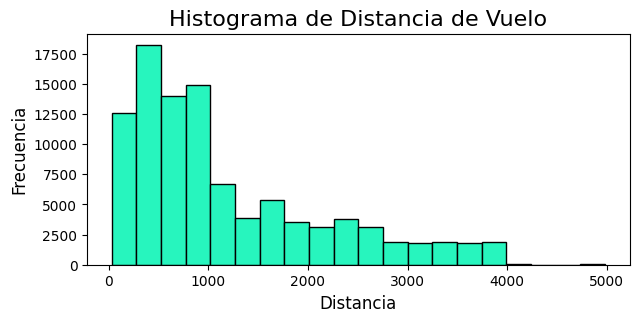

In [18]:
#Histograma de la columna 'Distancia de Vuelo'
plt.figure(figsize=(7, 3)) 
plt.hist(df['Distancia de Vuelo'], bins=20, color='#27F5BE', edgecolor='black');  
#Personalizar
plt.title('Histograma de Distancia de Vuelo', fontsize=16)
plt.xlabel('Distancia', fontsize=12)  
plt.ylabel('Frecuencia', fontsize=12)  

plt.show()

El histograma de ‘Distancia de Vuelo’ muestra una distribución sesgada a la izquierda, 
indicando que la mayoría de los vuelos, recorren una distancia menor a 1000 kilómetros.

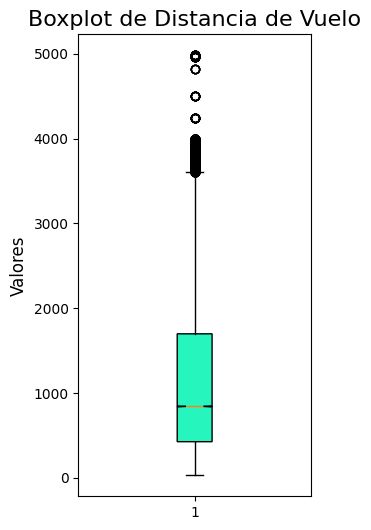

In [19]:
# Crear el boxplot
plt.figure(figsize=(3, 6))
plt.boxplot(df['Distancia de Vuelo'], patch_artist=True, notch=True, boxprops=dict(facecolor='#27F5BE', color='black'))

# Personalizar el gráfico
plt.title('Boxplot de Distancia de Vuelo', fontsize=16)
plt.ylabel('Valores', fontsize=12)

# Mostrar el gráfico
plt.show()

El boxplot de 'Distancia de Vuelo' muestra que la mayoría de los datos atípicos, se encientran arriba de los 3500 kilómetros. 

In [20]:
df.columns

Index(['id', 'Genero', 'Tipo de Cliente', 'Edad', 'Tipo de Viaje', 'Clase',
       'Distancia de Vuelo', 'Servicio de Wifi',
       'Tiempo de Llegada/Salida Conveniente',
       'Facilidad de Reservacion en Linea', 'Ubicacion de Puerta',
       'Comida y Bebida', 'Abordaje en Linea', 'Comodidad de Asiento',
       'Entretenimiento en Vuelo', 'Servicio en Mesa', 'Espacio del Asiento',
       'Servicio de Equipaje', 'Servicio de Checkin', 'Servicio de Vuelo',
       'Limpieza', 'Retraso de Salida', 'Retraso de Llegada', 'Satisfaccion'],
      dtype='object')

**• Columna Servicio de Wifi**

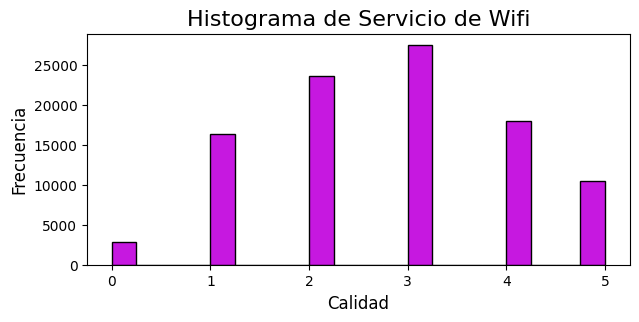

In [21]:
#Histograma de la columna 'Servicio de Wifi'
plt.figure(figsize=(7, 3)) 
plt.hist(df['Servicio de Wifi'], bins=20, color="#C618E0", edgecolor='black');  
#Personalizar
plt.title('Histograma de Servicio de Wifi', fontsize=16)
plt.xlabel('Calidad', fontsize=12)  
plt.ylabel('Frecuencia', fontsize=12)  

plt.show()

El histograma de ‘Servicio de Wifi’ muestra una distribución normal, 
indicando que la mayoría de los pasajeros, califican el servicio con una calidad estándar.

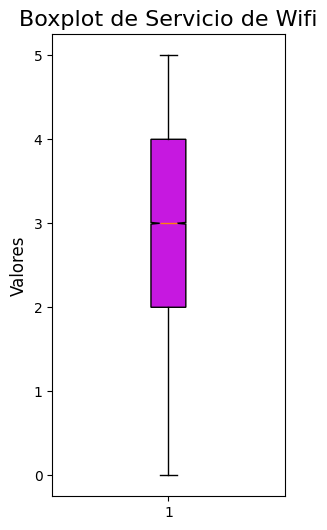

In [22]:
# Crear el boxplot
plt.figure(figsize=(3, 6))
plt.boxplot(df['Servicio de Wifi'], patch_artist=True, notch=True, boxprops=dict(facecolor='#C618E0', color='black'))

# Personalizar el gráfico
plt.title('Boxplot de Servicio de Wifi', fontsize=16)
plt.ylabel('Valores', fontsize=12)

# Mostrar el gráfico
plt.show()

In [23]:
df.columns

Index(['id', 'Genero', 'Tipo de Cliente', 'Edad', 'Tipo de Viaje', 'Clase',
       'Distancia de Vuelo', 'Servicio de Wifi',
       'Tiempo de Llegada/Salida Conveniente',
       'Facilidad de Reservacion en Linea', 'Ubicacion de Puerta',
       'Comida y Bebida', 'Abordaje en Linea', 'Comodidad de Asiento',
       'Entretenimiento en Vuelo', 'Servicio en Mesa', 'Espacio del Asiento',
       'Servicio de Equipaje', 'Servicio de Checkin', 'Servicio de Vuelo',
       'Limpieza', 'Retraso de Salida', 'Retraso de Llegada', 'Satisfaccion'],
      dtype='object')

**• Columna Tiempo de Llegada/Salida Conveniente**

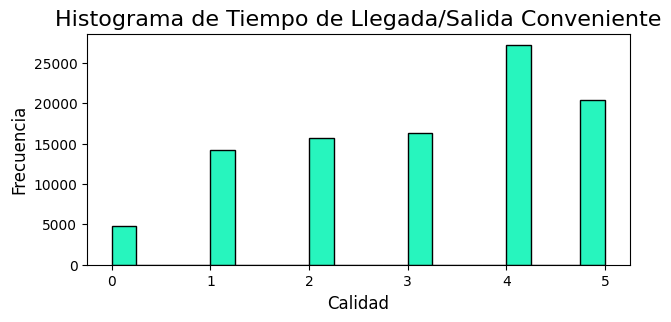

In [24]:
#Histograma de la columna 'Tiempo de Llegada/Salida Conveniente'
plt.figure(figsize=(7, 3)) 
plt.hist(df['Tiempo de Llegada/Salida Conveniente'], bins=20, color="#27F5BE", edgecolor='black');  
#Personalizar
plt.title('Histograma de Tiempo de Llegada/Salida Conveniente', fontsize=16)
plt.xlabel('Calidad', fontsize=12)  
plt.ylabel('Frecuencia', fontsize=12)  

plt.show()

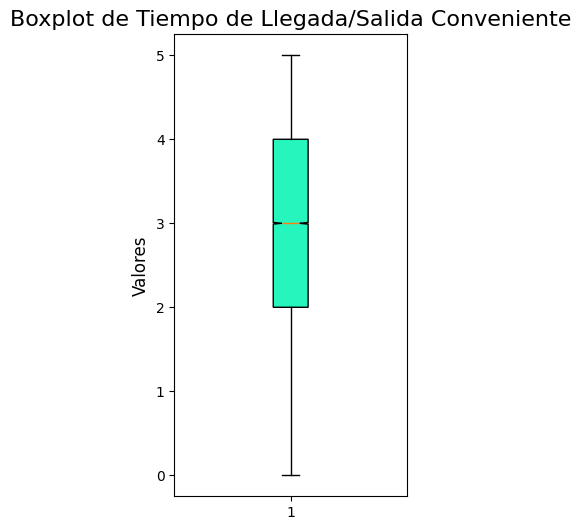

In [25]:
# Crear el boxplot
plt.figure(figsize=(3, 6))
plt.boxplot(df['Tiempo de Llegada/Salida Conveniente'], patch_artist=True, notch=True, boxprops=dict(facecolor='#27F5BE', color='black'))

# Personalizar el gráfico
plt.title('Boxplot de Tiempo de Llegada/Salida Conveniente', fontsize=16)
plt.ylabel('Valores', fontsize=12)

# Mostrar el gráfico
plt.show()

In [26]:
df.columns

Index(['id', 'Genero', 'Tipo de Cliente', 'Edad', 'Tipo de Viaje', 'Clase',
       'Distancia de Vuelo', 'Servicio de Wifi',
       'Tiempo de Llegada/Salida Conveniente',
       'Facilidad de Reservacion en Linea', 'Ubicacion de Puerta',
       'Comida y Bebida', 'Abordaje en Linea', 'Comodidad de Asiento',
       'Entretenimiento en Vuelo', 'Servicio en Mesa', 'Espacio del Asiento',
       'Servicio de Equipaje', 'Servicio de Checkin', 'Servicio de Vuelo',
       'Limpieza', 'Retraso de Salida', 'Retraso de Llegada', 'Satisfaccion'],
      dtype='object')

**• Columna Facilidad de Reservacion en Linea**

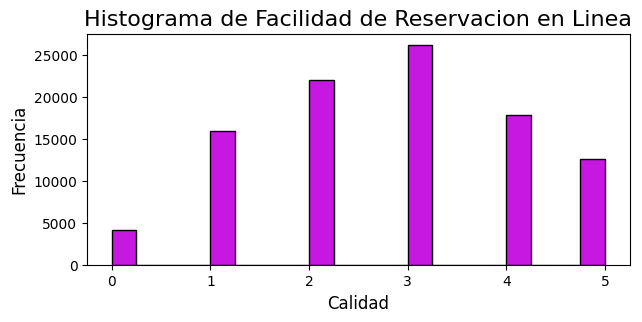

In [27]:
#Histograma de la columna 'Facilidad de Reservacion en Linea'
plt.figure(figsize=(7, 3)) 
plt.hist(df['Facilidad de Reservacion en Linea'], bins=20, color="#C618E0", edgecolor='black');  
#Personalizar
plt.title('Histograma de Facilidad de Reservacion en Linea', fontsize=16)
plt.xlabel('Calidad', fontsize=12)  
plt.ylabel('Frecuencia', fontsize=12)  

plt.show()

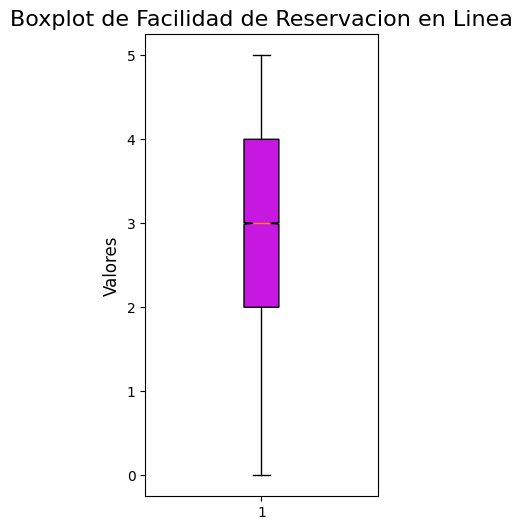

In [28]:
# Crear el boxplot
plt.figure(figsize=(3, 6))
plt.boxplot(df['Facilidad de Reservacion en Linea'], patch_artist=True, notch=True, boxprops=dict(facecolor='#C618E0', color='black'))

# Personalizar el gráfico
plt.title('Boxplot de Facilidad de Reservacion en Linea', fontsize=16)
plt.ylabel('Valores', fontsize=12)

# Mostrar el gráfico
plt.show()

In [29]:
df.columns

Index(['id', 'Genero', 'Tipo de Cliente', 'Edad', 'Tipo de Viaje', 'Clase',
       'Distancia de Vuelo', 'Servicio de Wifi',
       'Tiempo de Llegada/Salida Conveniente',
       'Facilidad de Reservacion en Linea', 'Ubicacion de Puerta',
       'Comida y Bebida', 'Abordaje en Linea', 'Comodidad de Asiento',
       'Entretenimiento en Vuelo', 'Servicio en Mesa', 'Espacio del Asiento',
       'Servicio de Equipaje', 'Servicio de Checkin', 'Servicio de Vuelo',
       'Limpieza', 'Retraso de Salida', 'Retraso de Llegada', 'Satisfaccion'],
      dtype='object')

**• Columna Ubicacion de Puerta**

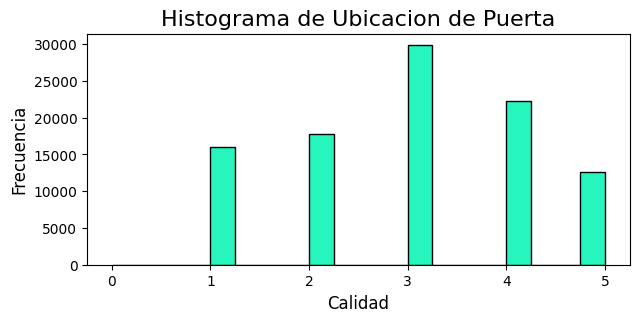

In [30]:
#Histograma de la columna 'Ubicacion de Puerta'
plt.figure(figsize=(7, 3)) 
plt.hist(df['Ubicacion de Puerta'], bins=20, color="#27F5BE", edgecolor='black');  
#Personalizar
plt.title('Histograma de Ubicacion de Puerta', fontsize=16)
plt.xlabel('Calidad', fontsize=12)  
plt.ylabel('Frecuencia', fontsize=12)  

plt.show()

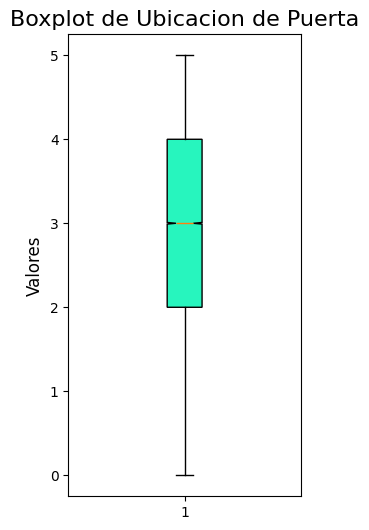

In [31]:
# Crear el boxplot
plt.figure(figsize=(3, 6))
plt.boxplot(df['Ubicacion de Puerta'], patch_artist=True, notch=True, boxprops=dict(facecolor='#27F5BE', color='black'))

# Personalizar el gráfico
plt.title('Boxplot de Ubicacion de Puerta', fontsize=16)
plt.ylabel('Valores', fontsize=12)

# Mostrar el gráfico
plt.show()

**• Columna Comida y Bebida**

In [32]:
df.columns

Index(['id', 'Genero', 'Tipo de Cliente', 'Edad', 'Tipo de Viaje', 'Clase',
       'Distancia de Vuelo', 'Servicio de Wifi',
       'Tiempo de Llegada/Salida Conveniente',
       'Facilidad de Reservacion en Linea', 'Ubicacion de Puerta',
       'Comida y Bebida', 'Abordaje en Linea', 'Comodidad de Asiento',
       'Entretenimiento en Vuelo', 'Servicio en Mesa', 'Espacio del Asiento',
       'Servicio de Equipaje', 'Servicio de Checkin', 'Servicio de Vuelo',
       'Limpieza', 'Retraso de Salida', 'Retraso de Llegada', 'Satisfaccion'],
      dtype='object')

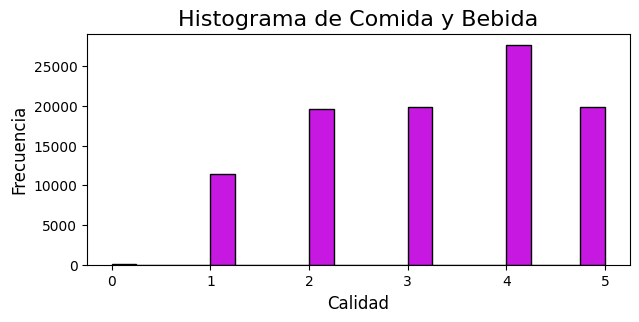

In [33]:
#Histograma de la columna 'Comida y Bebida'
plt.figure(figsize=(7, 3)) 
plt.hist(df['Comida y Bebida'], bins=20, color="#C618E0", edgecolor='black');  
#Personalizar
plt.title('Histograma de Comida y Bebida', fontsize=16)
plt.xlabel('Calidad', fontsize=12)  
plt.ylabel('Frecuencia', fontsize=12)  

plt.show()

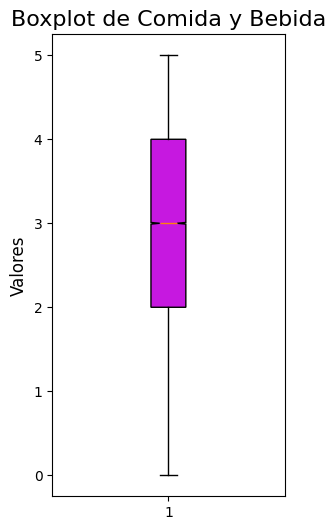

In [34]:
# Crear el boxplot
plt.figure(figsize=(3, 6))
plt.boxplot(df['Comida y Bebida'], patch_artist=True, notch=True, boxprops=dict(facecolor='#C618E0', color='black'))

# Personalizar el gráfico
plt.title('Boxplot de Comida y Bebida', fontsize=16)
plt.ylabel('Valores', fontsize=12)

# Mostrar el gráfico
plt.show()

**• Columna Abordaje en Linea**

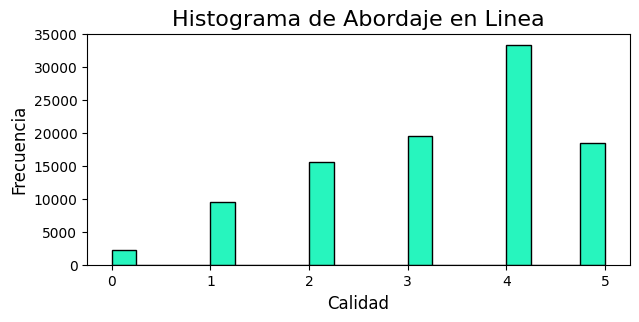

In [35]:
#Histograma de la columna 'Abordaje en Linea'
plt.figure(figsize=(7, 3)) 
plt.hist(df['Abordaje en Linea'], bins=20, color="#27F5BE", edgecolor='black');  
#Personalizar
plt.title('Histograma de Abordaje en Linea', fontsize=16)
plt.xlabel('Calidad', fontsize=12)  
plt.ylabel('Frecuencia', fontsize=12)  

plt.show()

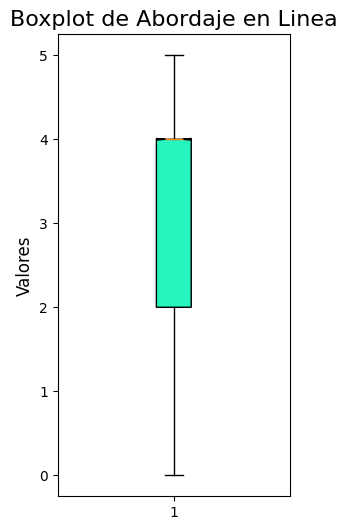

In [36]:
# Crear el boxplot
plt.figure(figsize=(3, 6))
plt.boxplot(df['Abordaje en Linea'], patch_artist=True, notch=True, boxprops=dict(facecolor='#27F5BE', color='black'))

# Personalizar el gráfico
plt.title('Boxplot de Abordaje en Linea', fontsize=16)
plt.ylabel('Valores', fontsize=12)

# Mostrar el gráfico
plt.show()

In [37]:
df.columns

Index(['id', 'Genero', 'Tipo de Cliente', 'Edad', 'Tipo de Viaje', 'Clase',
       'Distancia de Vuelo', 'Servicio de Wifi',
       'Tiempo de Llegada/Salida Conveniente',
       'Facilidad de Reservacion en Linea', 'Ubicacion de Puerta',
       'Comida y Bebida', 'Abordaje en Linea', 'Comodidad de Asiento',
       'Entretenimiento en Vuelo', 'Servicio en Mesa', 'Espacio del Asiento',
       'Servicio de Equipaje', 'Servicio de Checkin', 'Servicio de Vuelo',
       'Limpieza', 'Retraso de Salida', 'Retraso de Llegada', 'Satisfaccion'],
      dtype='object')

**• Columna Comodidad de Asiento**

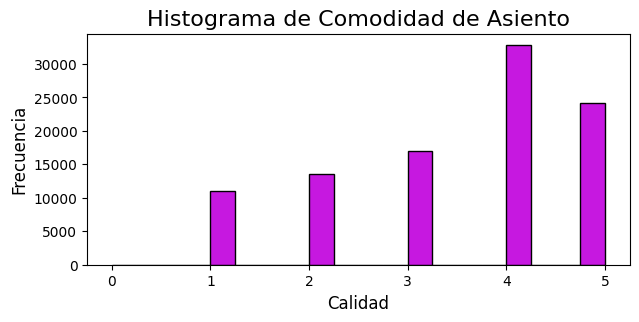

In [38]:
#Histograma de la columna 'Comodidad de Asiento'
plt.figure(figsize=(7, 3)) 
plt.hist(df['Comodidad de Asiento'], bins=20, color="#C618E0", edgecolor='black');  
#Personalizar
plt.title('Histograma de Comodidad de Asiento', fontsize=16)
plt.xlabel('Calidad', fontsize=12)  
plt.ylabel('Frecuencia', fontsize=12)  

plt.show()

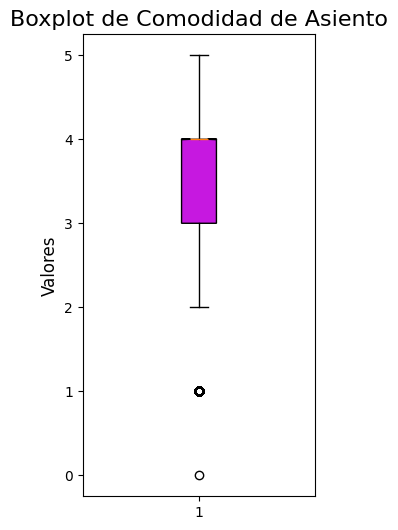

In [39]:
# Crear el boxplot
plt.figure(figsize=(3, 6))
plt.boxplot(df['Comodidad de Asiento'], patch_artist=True, notch=True, boxprops=dict(facecolor='#C618E0', color='black'))

# Personalizar el gráfico
plt.title('Boxplot de Comodidad de Asiento', fontsize=16)
plt.ylabel('Valores', fontsize=12)

# Mostrar el gráfico
plt.show()

**• Columna Entretenimiento en Vuelo**

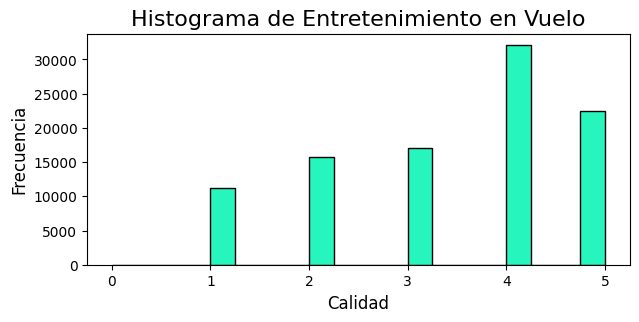

In [40]:
#Histograma de la columna 'Entretenimiento en Vuelo'
plt.figure(figsize=(7, 3)) 
plt.hist(df['Entretenimiento en Vuelo'], bins=20, color="#27F5BE", edgecolor='black');  
#Personalizar
plt.title('Histograma de Entretenimiento en Vuelo', fontsize=16)
plt.xlabel('Calidad', fontsize=12)  
plt.ylabel('Frecuencia', fontsize=12)  

plt.show()

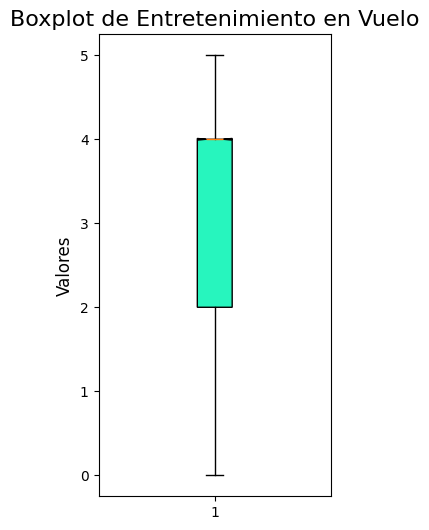

In [41]:
# Crear el boxplot
plt.figure(figsize=(3, 6))
plt.boxplot(df['Entretenimiento en Vuelo'], patch_artist=True, notch=True, boxprops=dict(facecolor='#27F5BE', color='black'))

# Personalizar el gráfico
plt.title('Boxplot de Entretenimiento en Vuelo', fontsize=16)
plt.ylabel('Valores', fontsize=12)

# Mostrar el gráfico
plt.show()

In [42]:
df.columns

Index(['id', 'Genero', 'Tipo de Cliente', 'Edad', 'Tipo de Viaje', 'Clase',
       'Distancia de Vuelo', 'Servicio de Wifi',
       'Tiempo de Llegada/Salida Conveniente',
       'Facilidad de Reservacion en Linea', 'Ubicacion de Puerta',
       'Comida y Bebida', 'Abordaje en Linea', 'Comodidad de Asiento',
       'Entretenimiento en Vuelo', 'Servicio en Mesa', 'Espacio del Asiento',
       'Servicio de Equipaje', 'Servicio de Checkin', 'Servicio de Vuelo',
       'Limpieza', 'Retraso de Salida', 'Retraso de Llegada', 'Satisfaccion'],
      dtype='object')

**• Columna Servicio en Mesa**

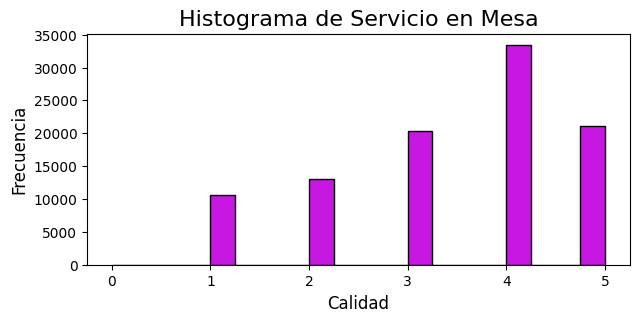

In [43]:
#Histograma de la columna 'Servicio en Mesa'
plt.figure(figsize=(7, 3)) 
plt.hist(df['Servicio en Mesa'], bins=20, color="#C618E0", edgecolor='black');  
#Personalizar
plt.title('Histograma de Servicio en Mesa', fontsize=16)
plt.xlabel('Calidad', fontsize=12)  
plt.ylabel('Frecuencia', fontsize=12)  

plt.show()

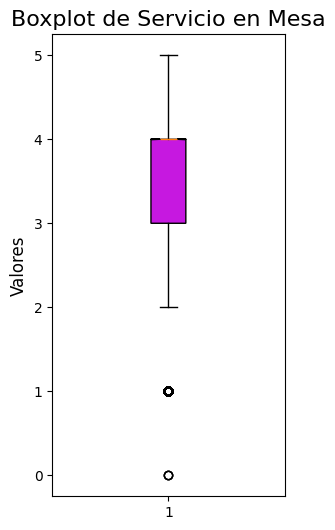

In [44]:
# Crear el boxplot
plt.figure(figsize=(3, 6))
plt.boxplot(df['Servicio en Mesa'], patch_artist=True, notch=True, boxprops=dict(facecolor='#C618E0', color='black'))

# Personalizar el gráfico
plt.title('Boxplot de Servicio en Mesa', fontsize=16)
plt.ylabel('Valores', fontsize=12)

# Mostrar el gráfico
plt.show()

In [45]:
df.columns

Index(['id', 'Genero', 'Tipo de Cliente', 'Edad', 'Tipo de Viaje', 'Clase',
       'Distancia de Vuelo', 'Servicio de Wifi',
       'Tiempo de Llegada/Salida Conveniente',
       'Facilidad de Reservacion en Linea', 'Ubicacion de Puerta',
       'Comida y Bebida', 'Abordaje en Linea', 'Comodidad de Asiento',
       'Entretenimiento en Vuelo', 'Servicio en Mesa', 'Espacio del Asiento',
       'Servicio de Equipaje', 'Servicio de Checkin', 'Servicio de Vuelo',
       'Limpieza', 'Retraso de Salida', 'Retraso de Llegada', 'Satisfaccion'],
      dtype='object')

**• Columna Espacio del Asiento**

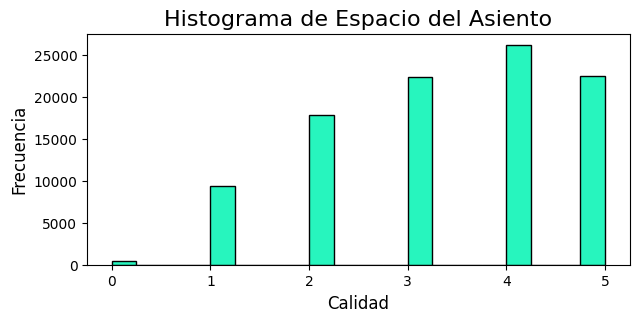

In [46]:
#Histograma de la columna 'Espacio del Asiento'
plt.figure(figsize=(7, 3)) 
plt.hist(df['Espacio del Asiento'], bins=20, color="#27F5BE", edgecolor='black');  
#Personalizar
plt.title('Histograma de Espacio del Asiento', fontsize=16)
plt.xlabel('Calidad', fontsize=12)  
plt.ylabel('Frecuencia', fontsize=12)  

plt.show()

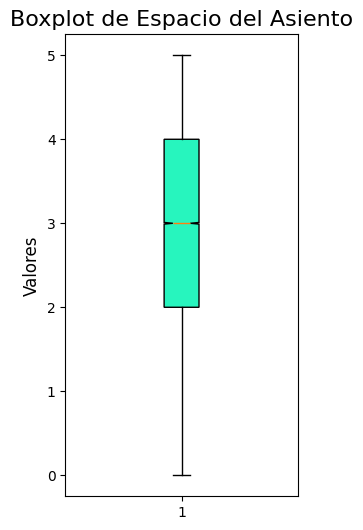

In [47]:
# Crear el boxplot
plt.figure(figsize=(3, 6))
plt.boxplot(df['Espacio del Asiento'], patch_artist=True, notch=True, boxprops=dict(facecolor='#27F5BE', color='black'))

# Personalizar el gráfico
plt.title('Boxplot de Espacio del Asiento', fontsize=16)
plt.ylabel('Valores', fontsize=12)

# Mostrar el gráfico
plt.show()

**• Columna Servicio de Equipaje**

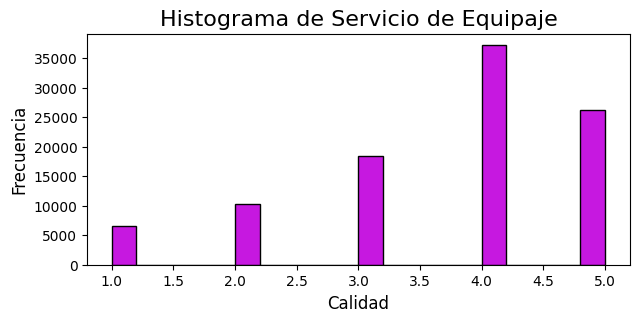

In [48]:
#Histograma de la columna 'Servicio de Equipaje'
plt.figure(figsize=(7, 3)) 
plt.hist(df['Servicio de Equipaje'], bins=20, color="#C618E0", edgecolor='black');  
#Personalizar
plt.title('Histograma de Servicio de Equipaje', fontsize=16)
plt.xlabel('Calidad', fontsize=12)  
plt.ylabel('Frecuencia', fontsize=12)  

plt.show()

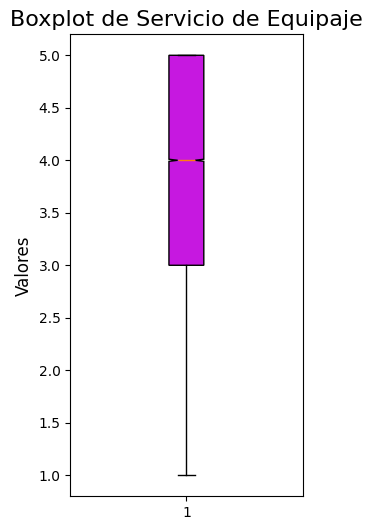

In [49]:
# Crear el boxplot
plt.figure(figsize=(3, 6))
plt.boxplot(df['Servicio de Equipaje'], patch_artist=True, notch=True, boxprops=dict(facecolor='#C618E0', color='black'))

# Personalizar el gráfico
plt.title('Boxplot de Servicio de Equipaje', fontsize=16)
plt.ylabel('Valores', fontsize=12)

# Mostrar el gráfico
plt.show()

**• Columna Servicio de Checkin**

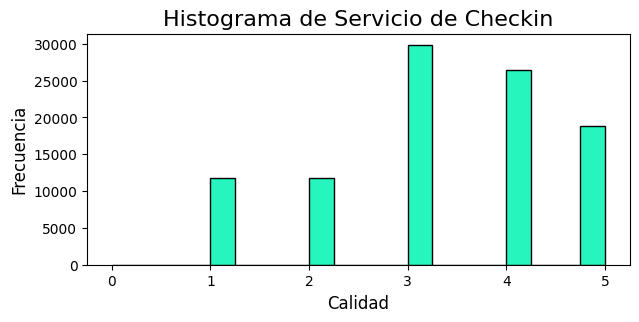

In [50]:
#Histograma de la columna 'Servicio de Checkin'
plt.figure(figsize=(7, 3)) 
plt.hist(df['Servicio de Checkin'], bins=20, color="#27F5BE", edgecolor='black');  
#Personalizar
plt.title('Histograma de Servicio de Checkin', fontsize=16)
plt.xlabel('Calidad', fontsize=12)  
plt.ylabel('Frecuencia', fontsize=12)  

plt.show()

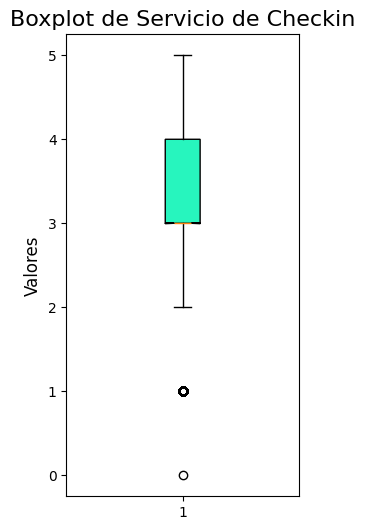

In [51]:
# Crear el boxplot
plt.figure(figsize=(3, 6))
plt.boxplot(df['Servicio de Checkin'], patch_artist=True, notch=True, boxprops=dict(facecolor='#27F5BE', color='black'))

# Personalizar el gráfico
plt.title('Boxplot de Servicio de Checkin', fontsize=16)
plt.ylabel('Valores', fontsize=12)

# Mostrar el gráfico
plt.show()

**• Columna Servicio de Vuelo**

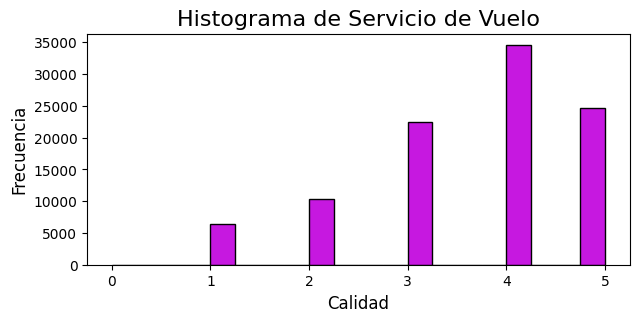

In [52]:
#Histograma de la columna 'Servicio de Vuelo'
plt.figure(figsize=(7, 3)) 
plt.hist(df['Servicio de Vuelo'], bins=20, color="#C618E0", edgecolor='black');  
#Personalizar
plt.title('Histograma de Servicio de Vuelo', fontsize=16)
plt.xlabel('Calidad', fontsize=12)  
plt.ylabel('Frecuencia', fontsize=12)  

plt.show()

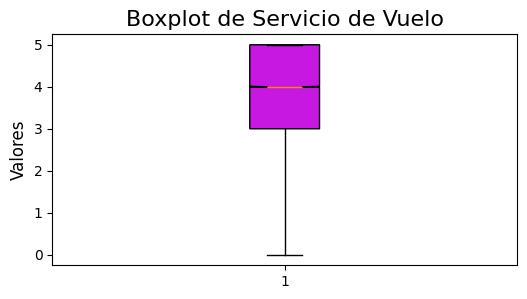

In [53]:
# Crear el boxplot
plt.figure(figsize=(6, 3))
plt.boxplot(df['Servicio de Vuelo'], patch_artist=True, notch=True, boxprops=dict(facecolor='#C618E0', color='black'))

# Personalizar el gráfico
plt.title('Boxplot de Servicio de Vuelo', fontsize=16)
plt.ylabel('Valores', fontsize=12)

# Mostrar el gráfico
plt.show()

**• Columna Limpieza**

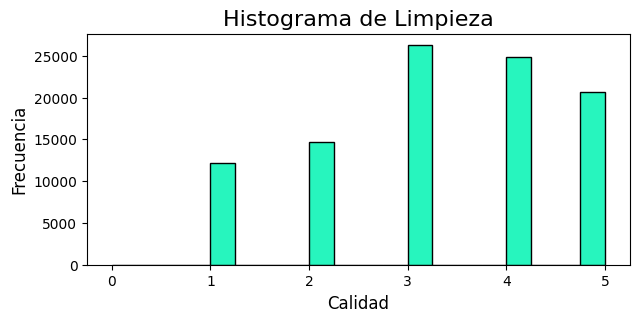

In [54]:
#Histograma de la columna 'Limpieza'
plt.figure(figsize=(7, 3)) 
plt.hist(df['Limpieza'], bins=20, color="#27F5BE", edgecolor='black');  
#Personalizar
plt.title('Histograma de Limpieza', fontsize=16)
plt.xlabel('Calidad', fontsize=12)  
plt.ylabel('Frecuencia', fontsize=12)  

plt.show()

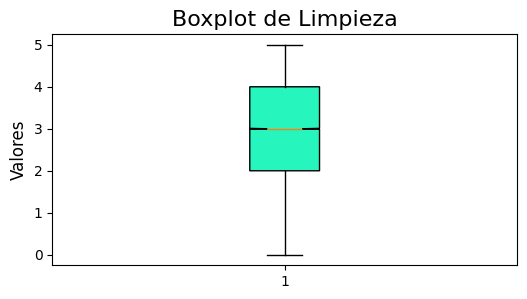

In [55]:
# Crear el boxplot
plt.figure(figsize=(6, 3))
plt.boxplot(df['Limpieza'], patch_artist=True, notch=True, boxprops=dict(facecolor='#27F5BE', color='black'))

# Personalizar el gráfico
plt.title('Boxplot de Limpieza', fontsize=16)
plt.ylabel('Valores', fontsize=12)

# Mostrar el gráfico
plt.show()

**• Columna Retraso de Salida**

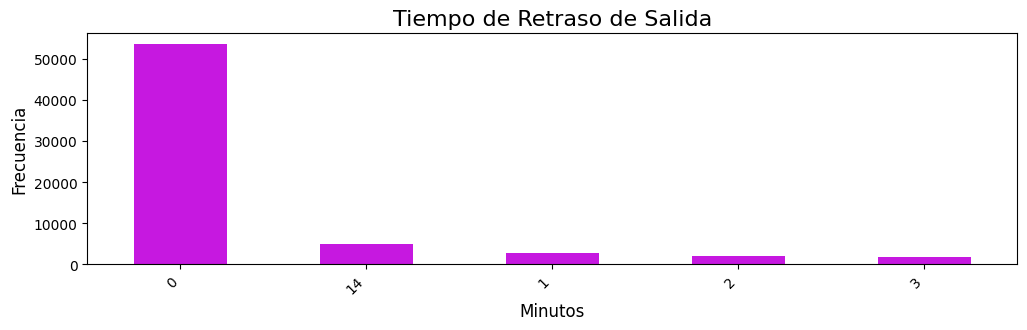

In [56]:
plt.figure(figsize=(12, 3))

df['Retraso de Salida'].value_counts().nlargest(5).plot(kind='bar', color='#C618E0')

# Personalización del gráfico
plt.title('Tiempo de Retraso de Salida', fontsize=16)
plt.xlabel('Minutos', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Rotar las etiquetas del eje X
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

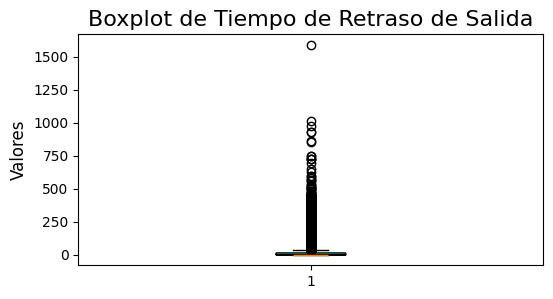

In [57]:
# Crear el boxplot
plt.figure(figsize=(6, 3))
plt.boxplot(df['Retraso de Salida'], patch_artist=True, notch=True, boxprops=dict(facecolor='#27F5BE', color='black'))

# Personalizar el gráfico
plt.title('Boxplot de Tiempo de Retraso de Salida', fontsize=16)
plt.ylabel('Valores', fontsize=12)

# Mostrar el gráfico
plt.show()

**• Columna Retraso de Llegada**

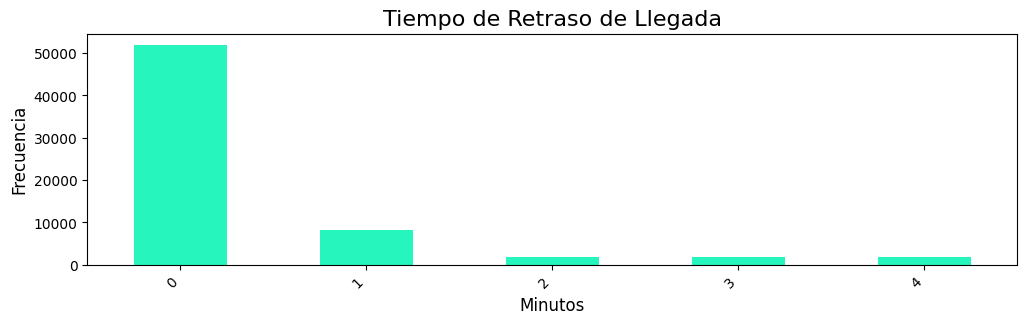

In [58]:
plt.figure(figsize=(12, 3))

df['Retraso de Llegada'].value_counts().nlargest(5).plot(kind='bar', color='#27F5BE')

# Personalización del gráfico
plt.title('Tiempo de Retraso de Llegada', fontsize=16)
plt.xlabel('Minutos', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Rotar las etiquetas del eje X
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

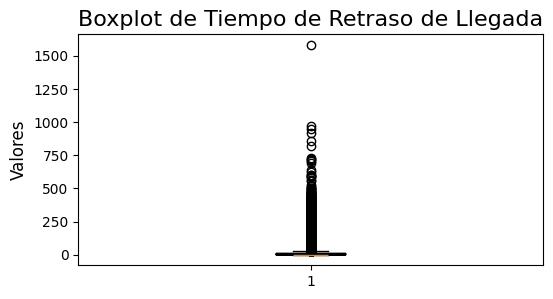

In [59]:
# Crear el boxplot
plt.figure(figsize=(6, 3))
plt.boxplot(df['Retraso de Llegada'], patch_artist=True, notch=True, boxprops=dict(facecolor='#27F5BE', color='black'))

# Personalizar el gráfico
plt.title('Boxplot de Tiempo de Retraso de Llegada', fontsize=16)
plt.ylabel('Valores', fontsize=12)

# Mostrar el gráfico
plt.show()

## **• Variables Categóricas**

In [60]:
df.dtypes

id                                      object
Genero                                  object
Tipo de Cliente                         object
Edad                                     int64
Tipo de Viaje                           object
Clase                                   object
Distancia de Vuelo                       int64
Servicio de Wifi                         int64
Tiempo de Llegada/Salida Conveniente     int64
Facilidad de Reservacion en Linea        int64
Ubicacion de Puerta                      int64
Comida y Bebida                          int64
Abordaje en Linea                        int64
Comodidad de Asiento                     int64
Entretenimiento en Vuelo                 int64
Servicio en Mesa                         int64
Espacio del Asiento                      int64
Servicio de Equipaje                     int64
Servicio de Checkin                      int64
Servicio de Vuelo                        int64
Limpieza                                 int64
Retraso de Sa

**• Columna Género**

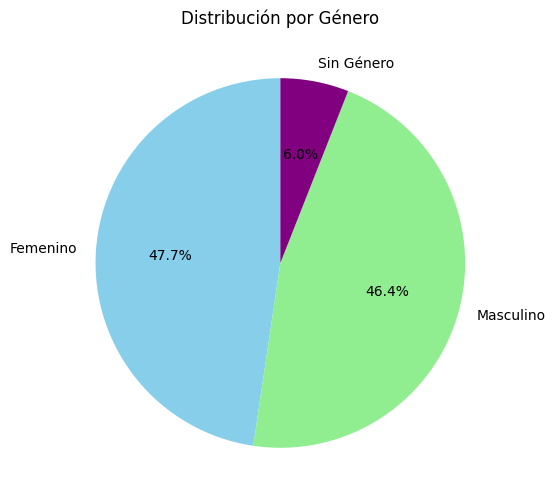

In [61]:
# Contar la cantidad de clientes por género
gender_counts = df['Genero'].value_counts()

# Gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90,
         colors=['skyblue', 'lightgreen','purple'])
plt.title('Distribución por Género')
plt.show()

El gráfico del Género, muestra un balance entre las personas del género masculino y femenino, ya que tienen un porcentaje de distribución similar.

**• Columna Tipo de Cliente**

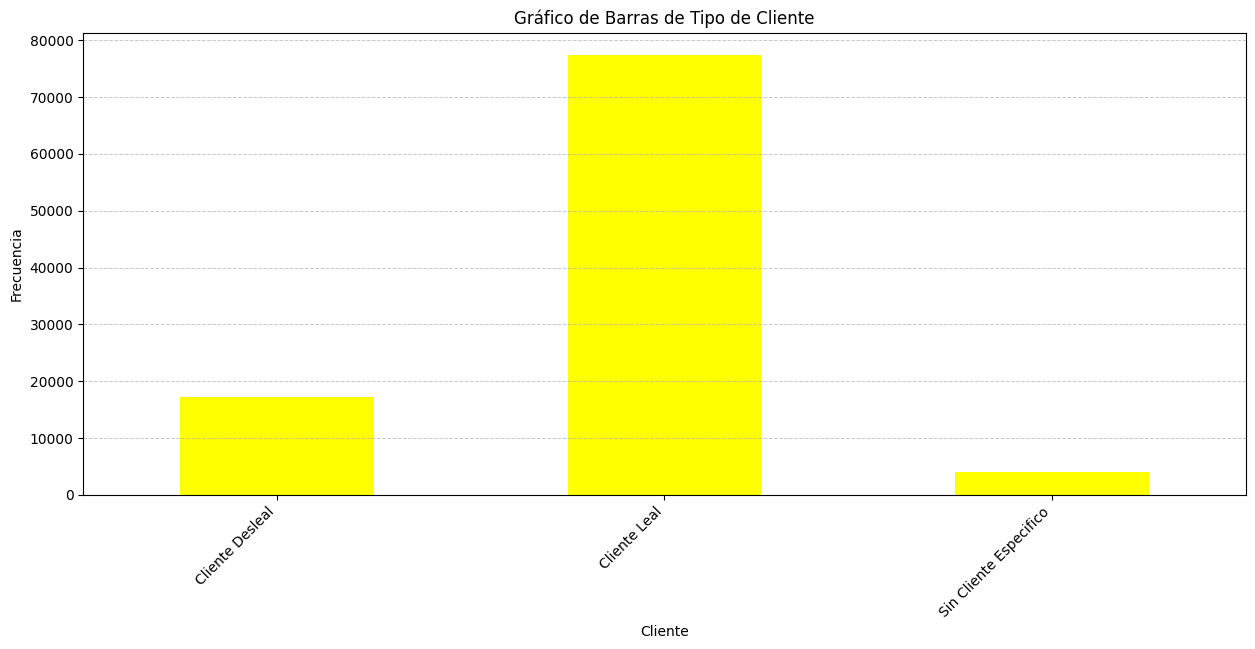

In [62]:
plt.figure(figsize=(15, 6))

df['Tipo de Cliente'].value_counts().sort_index().plot(kind='bar', color='yellow')

# Personalización del gráfico
plt.title('Gráfico de Barras de Tipo de Cliente')
plt.xlabel('Cliente')
plt.ylabel('Frecuencia')

plt.xticks(rotation=45, ha='right')

# Añadir rejilla
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Mostrar el gráfico
plt.show()

La mayoría de personas que viajan con una aerolínea son clientes leales que recurren nuevamente.

**• Columna Tipo de Viaje**

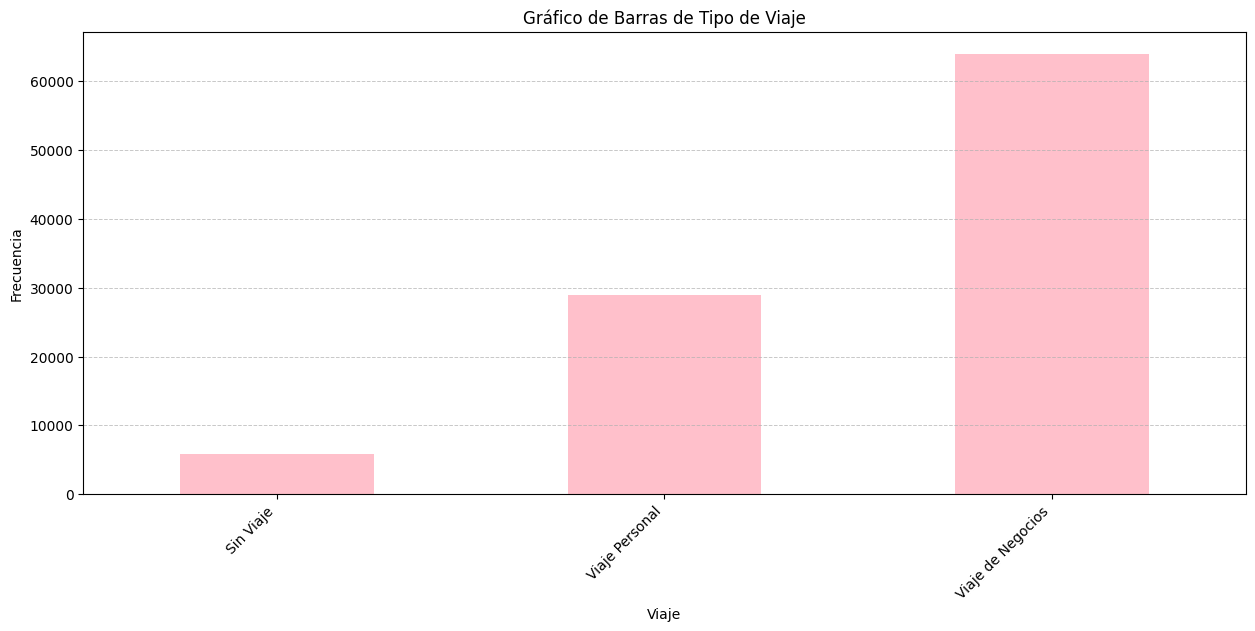

In [63]:
plt.figure(figsize=(15, 6))

df['Tipo de Viaje'].value_counts().sort_index().plot(kind='bar', color='pink')

# Personalización del gráfico
plt.title('Gráfico de Barras de Tipo de Viaje')
plt.xlabel('Viaje')
plt.ylabel('Frecuencia')

plt.xticks(rotation=45, ha='right')

# Añadir rejilla
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Mostrar el gráfico
plt.show()

Los viajes que se realizan con mayor frecuencia son viajes de negocios.

**• Columna Clase**

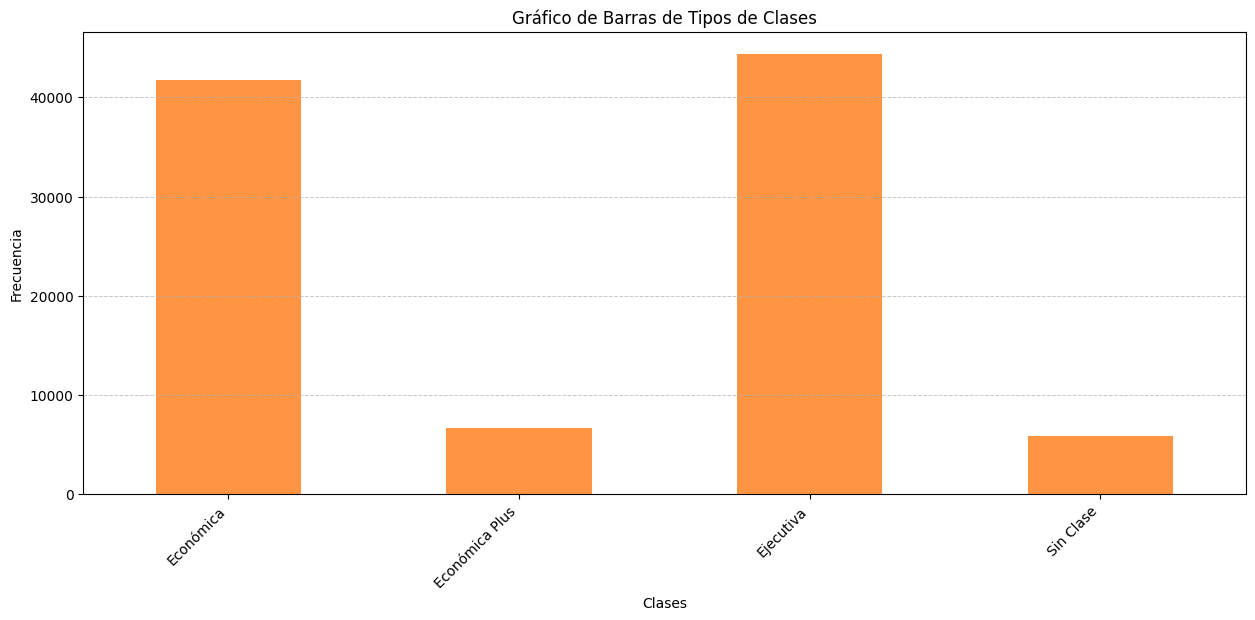

In [64]:
plt.figure(figsize=(15, 6))

df['Clase'].value_counts().sort_index().plot(kind='bar', color='#FF9442')

# Personalización del gráfico
plt.title('Gráfico de Barras de Tipos de Clases')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')

plt.xticks(rotation=45, ha='right')

# Añadir rejilla
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Mostrar el gráfico
plt.show()

Las clases Ejecutiva y Económica tienen el dominio sobre los vuelos de los clientes.

**• Columna Satisfacción**

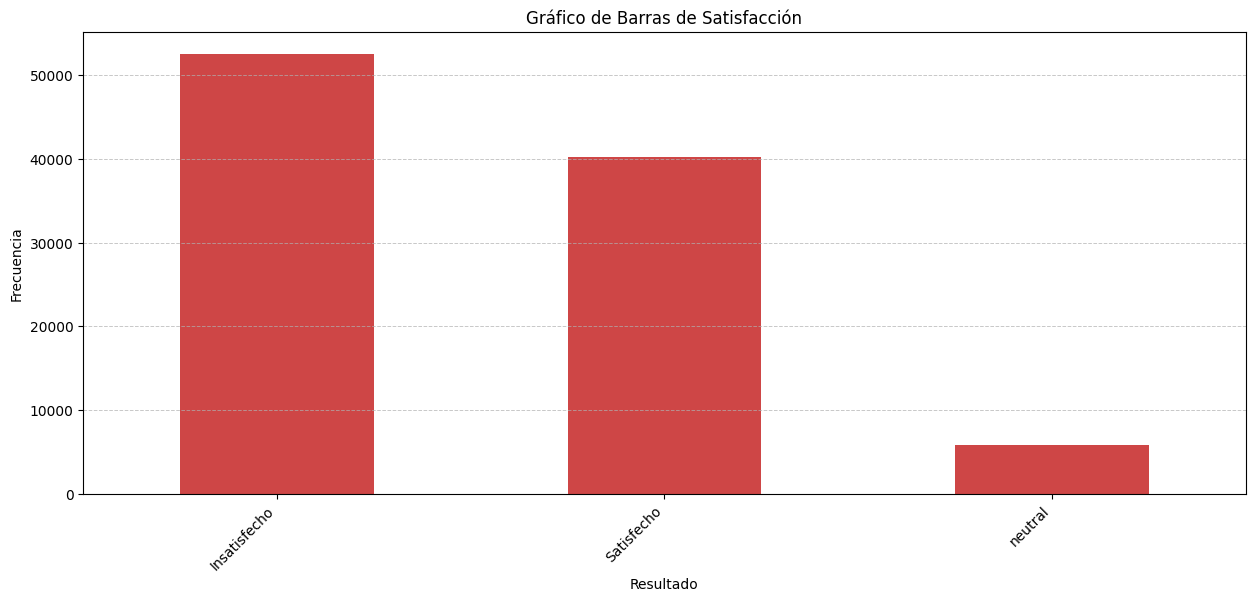

In [65]:
plt.figure(figsize=(15, 6))

df['Satisfaccion'].value_counts().sort_index().plot(kind='bar', color="#CE4646")

# Personalización del gráfico
plt.title('Gráfico de Barras de Satisfacción')
plt.xlabel('Resultado')
plt.ylabel('Frecuencia')

plt.xticks(rotation=45, ha='right')

# Añadir rejilla
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Mostrar el gráfico
plt.show()

La insatisfacción es un problema dominante, por lo tanto, se buscarán estrategias para resolverlo.

# **3. Correlación entre Variables**

## **•Matriz de Correlación**

In [66]:
df.columns

Index(['id', 'Genero', 'Tipo de Cliente', 'Edad', 'Tipo de Viaje', 'Clase',
       'Distancia de Vuelo', 'Servicio de Wifi',
       'Tiempo de Llegada/Salida Conveniente',
       'Facilidad de Reservacion en Linea', 'Ubicacion de Puerta',
       'Comida y Bebida', 'Abordaje en Linea', 'Comodidad de Asiento',
       'Entretenimiento en Vuelo', 'Servicio en Mesa', 'Espacio del Asiento',
       'Servicio de Equipaje', 'Servicio de Checkin', 'Servicio de Vuelo',
       'Limpieza', 'Retraso de Salida', 'Retraso de Llegada', 'Satisfaccion'],
      dtype='object')

In [67]:
# Seleccionar solo las columnas numéricas
df_numeric = df[['Edad','Distancia de Vuelo','Servicio de Wifi','Tiempo de Llegada/Salida Conveniente',
                 'Facilidad de Reservacion en Linea','Ubicacion de Puerta','Comida y Bebida',
                 'Abordaje en Linea','Comodidad de Asiento','Entretenimiento en Vuelo', 'Servicio en Mesa', 'Espacio del Asiento',
                 'Servicio de Equipaje', 'Servicio de Checkin', 'Servicio de Vuelo',
                 'Limpieza', 'Retraso de Salida', 'Retraso de Llegada']]
# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()
correlation_matrix

,Edad,Distancia de Vuelo,Servicio de Wifi,Tiempo de Llegada/Salida Conveniente,Facilidad de Reservacion en Linea,Ubicacion de Puerta,Comida y Bebida,Abordaje en Linea,Comodidad de Asiento,Entretenimiento en Vuelo,Servicio en Mesa,Espacio del Asiento,Servicio de Equipaje,Servicio de Checkin,Servicio de Vuelo,Limpieza,Retraso de Salida,Retraso de Llegada
Edad,1.000000,0.092802,0.016978,0.035340,0.023283,-0.001950,0.022589,0.194906,0.150374,0.070960,0.054171,0.038472,-0.042781,0.034343,-0.045599,0.051933,-0.009604,-0.010968
Distancia de Vuelo,0.092802,1.000000,0.008097,-0.017547,0.064086,0.006405,0.053721,0.200752,0.149377,0.119735,0.102341,0.128356,0.058204,0.067324,0.055029,0.087303,0.000096,-0.003286
Servicio de Wifi,0.016978,0.008097,1.000000,0.329926,0.686384,0.322256,0.127461,0.427734,0.115455,0.197693,0.114754,0.153359,0.113201,0.039573,0.106700,0.126879,-0.016689,-0.017165
Tiempo de Llegada/Salida Conveniente,0.035340,-0.017547,0.329926,1.000000,0.418367,0.425040,0.004883,0.063954,0.010218,-0.002836,0.066227,0.014231,0.069251,0.087643,0.071308,0.013113,0.000944,-0.000727
Facilidad de Reservacion en Linea,0.023283,0.064086,0.686384,0.418367,1.000000,0.441045,0.031132,0.378700,0.028530,0.045233,0.038886,0.102781,0.037356,0.010871,0.036510,0.016526,-0.007988,-0.008082
Ubicacion de Puerta,-0.001950,0.006405,0.322256,0.425040,0.441045,1.000000,0.000843,0.000443,0.002717,0.005263,-0.026303,-0.006193,0.002157,-0.034000,0.003701,-0.002535,0.004745,0.004069
Comida y Bebida,0.022589,0.053721,0.127461,0.004883,0.031132,0.000843,1.000000,0.216206,0.537808,0.574755,0.053932,0.030883,0.032678,0.082643,0.031127,0.617767,-0.031038,-0.031357
Abordaje en Linea,0.194906,0.200752,0.427734,0.063954,0.378700,0.000443,0.216206,1.000000,0.394256,0.263207,0.143356,0.114953,0.076223,0.193686,0.067666,0.311303,-0.016839,-0.018362
Comodidad de Asiento,0.150374,0.149377,0.115455,0.010218,0.028530,0.002717,0.537808,0.394256,1.000000,0.571930,0.124303,0.100956,0.070252,0.185394,0.064948,0.648476,-0.028838,-0.027825
Entretenimiento en Vuelo,0.070960,0.119735,0.197693,-0.002836,0.045233,0.005263,0.574755,0.263207,0.571930,1.000000,0.391482,0.281055,0.350885,0.114925,0.379816,0.652260,-0.025602,-0.026876


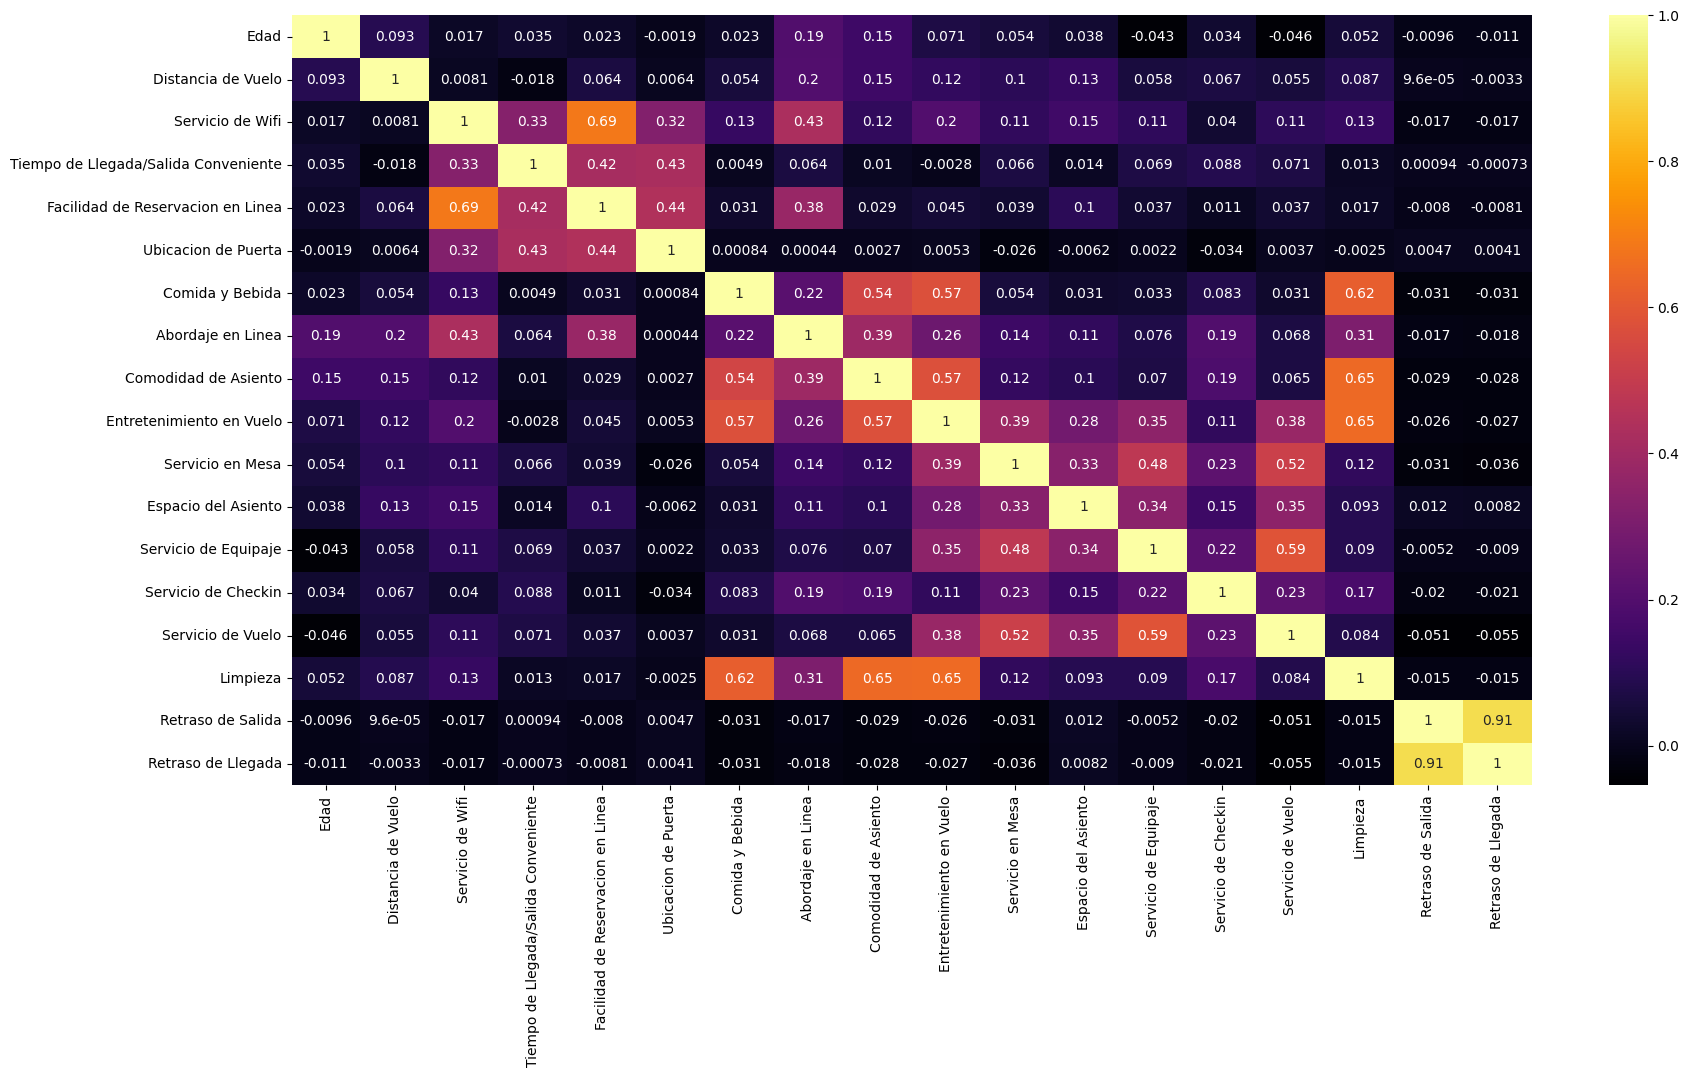

In [68]:
#Heatmap
plt.figure(figsize=(20,10))
# Gráfico de calor
sns.heatmap(correlation_matrix, annot=True, cmap='inferno')
# Mostrar gráfico
plt.show()

La variable ‘Retraso de Salida’ tiene una correlación de 0.91 con ‘Retraso de Llegada’, lo 
que sugiere una relación directa.

## **•Parejas de Variables**

<Axes: xlabel='Retraso de Salida', ylabel='Retraso de Llegada'>

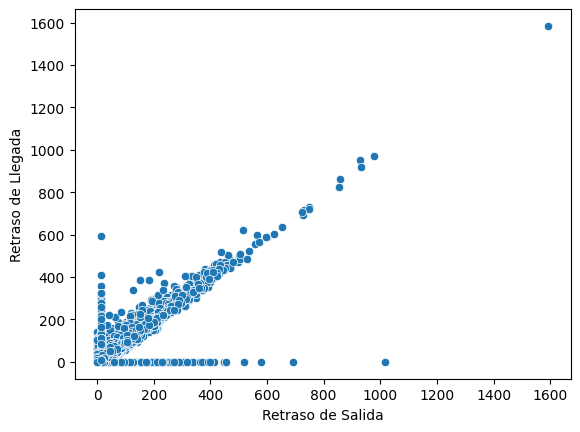

In [69]:
#Relación entre variables
sns.scatterplot(x='Retraso de Salida', y='Retraso de Llegada', data=df) 

In [70]:
df2=df.copy()

In [71]:
df.dtypes

id                                      object
Genero                                  object
Tipo de Cliente                         object
Edad                                     int64
Tipo de Viaje                           object
Clase                                   object
Distancia de Vuelo                       int64
Servicio de Wifi                         int64
Tiempo de Llegada/Salida Conveniente     int64
Facilidad de Reservacion en Linea        int64
Ubicacion de Puerta                      int64
Comida y Bebida                          int64
Abordaje en Linea                        int64
Comodidad de Asiento                     int64
Entretenimiento en Vuelo                 int64
Servicio en Mesa                         int64
Espacio del Asiento                      int64
Servicio de Equipaje                     int64
Servicio de Checkin                      int64
Servicio de Vuelo                        int64
Limpieza                                 int64
Retraso de Sa

In [72]:
df['Genero'].unique()

array(['Masculino', 'Femenino', 'Sin Género'], dtype=object)

In [73]:
# Convertir las columnas columnas categoricas a numéricas
df2['Genero'] = df2['Genero'].map({'Masculino': 2, 'Femenino': 1, 'Sin Género':3})
df2['Tipo de Cliente'] = df2['Tipo de Cliente'].map({'Cliente Leal': 1, 'Cliente Desleal': 0,'Sin Cliente Especifico':2})
df2['Tipo de Viaje'] = df2['Tipo de Viaje'].map({'Viaje Personal': 1, 'Viaje de Negocios': 2,'Sin Viaje':3,})
df2['Clase'] = df2['Clase'].map({'Sin Clase': 0, 'Ejecutiva': 3, 'Económica':1, 'Económica Plus':2})
df2['Satisfaccion'] = df2['Satisfaccion'].map({'Insatisfecho': 0, 'neutral': 1, 'Satisfecho':2})
df2

,id,Genero,Tipo de Cliente,Edad,Tipo de Viaje,Clase,Distancia de Vuelo,Servicio de Wifi,Tiempo de Llegada/Salida Conveniente,Facilidad de Reservacion en Linea,...,Entretenimiento en Vuelo,Servicio en Mesa,Espacio del Asiento,Servicio de Equipaje,Servicio de Checkin,Servicio de Vuelo,Limpieza,Retraso de Salida,Retraso de Llegada,Satisfaccion
0,70172.0,2,1,13,1,0,460,3,4,3,...,5,4,3,4,4,5,5,25,18,0
1,5047.0,2,0,25,2,3,235,3,2,3,...,1,1,5,3,1,4,1,1,6,0
2,110028.0,1,2,26,2,3,1142,2,2,2,...,5,4,3,4,4,4,5,0,0,1
3,24026.0,1,1,39,2,3,562,2,5,5,...,2,2,5,3,1,4,2,11,9,0
4,119299.0,2,1,61,2,3,214,3,3,3,...,3,3,4,4,3,3,3,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98660,15853.0,1,1,39,2,3,2536,5,1,5,...,1,5,3,1,5,2,5,271,243,2
98661,83437.0,1,0,23,2,1,632,3,0,3,...,2,3,3,5,5,3,2,0,1,0
98662,104401.0,2,1,60,2,3,3545,5,4,5,...,4,4,4,4,4,3,3,3,0,2
98663,114393.0,1,1,44,2,3,3534,2,2,2,...,5,5,5,5,5,5,5,0,0,2


In [74]:
# Seleccionar solo las columnas numéricas
df2_numeric = df2[['Genero','Tipo de Cliente','Tipo de Viaje','Clase','Edad','Distancia de Vuelo','Servicio de Wifi','Tiempo de Llegada/Salida Conveniente',
                 'Facilidad de Reservacion en Linea','Ubicacion de Puerta','Comida y Bebida',
                 'Abordaje en Linea','Comodidad de Asiento','Entretenimiento en Vuelo', 'Servicio en Mesa', 'Espacio del Asiento',
                 'Servicio de Equipaje', 'Servicio de Checkin', 'Servicio de Vuelo',
                 'Limpieza', 'Retraso de Salida', 'Retraso de Llegada','Satisfaccion']]
# Calcular la matriz de correlación
correlation_matrix2 = df2_numeric.corr()
correlation_matrix2

,Genero,Tipo de Cliente,Tipo de Viaje,Clase,Edad,Distancia de Vuelo,Servicio de Wifi,Tiempo de Llegada/Salida Conveniente,Facilidad de Reservacion en Linea,Ubicacion de Puerta,...,Entretenimiento en Vuelo,Servicio en Mesa,Espacio del Asiento,Servicio de Equipaje,Servicio de Checkin,Servicio de Vuelo,Limpieza,Retraso de Salida,Retraso de Llegada,Satisfaccion
Genero,1.000000,0.018167,-0.003771,0.003739,0.007474,0.005323,0.004685,0.005402,0.005561,0.002722,...,0.006974,0.003871,0.024438,0.028633,0.008489,0.031638,0.005360,0.001960,0.000296,0.008052
Tipo de Cliente,0.018167,1.000000,-0.204887,0.074203,0.225422,0.184434,0.010433,0.173366,0.018221,-0.001980,...,0.086546,0.045377,0.037505,-0.019618,0.028275,-0.017573,0.067655,-0.005960,-0.007152,0.148888
Tipo de Viaje,-0.003771,-0.204887,1.000000,0.373019,0.035151,0.208144,0.086676,-0.198873,0.108684,0.021377,...,0.115357,0.044750,0.109105,0.023662,-0.010963,0.017690,0.062201,0.003626,0.005790,0.350422
Clase,0.003739,0.074203,0.373019,1.000000,0.114289,0.379776,0.028442,-0.078747,0.088498,0.003259,...,0.158513,0.172618,0.171909,0.133229,0.126653,0.131707,0.111398,-0.009626,-0.010748,0.410322
Edad,0.007474,0.225422,0.035151,0.114289,1.000000,0.092802,0.016978,0.035340,0.023283,-0.001950,...,0.070960,0.054171,0.038472,-0.042781,0.034343,-0.045599,0.051933,-0.009604,-0.010968,0.128149
Distancia de Vuelo,0.005323,0.184434,0.208144,0.379776,0.092802,1.000000,0.008097,-0.017547,0.064086,0.006405,...,0.119735,0.102341,0.128356,0.058204,0.067324,0.055029,0.087303,0.000096,-0.003286,0.280420
Servicio de Wifi,0.004685,0.010433,0.086676,0.028442,0.016978,0.008097,1.000000,0.329926,0.686384,0.322256,...,0.197693,0.114754,0.153359,0.113201,0.039573,0.106700,0.126879,-0.016689,-0.017165,0.269792
Tiempo de Llegada/Salida Conveniente,0.005402,0.173366,-0.198873,-0.078747,0.035340,-0.017547,0.329926,1.000000,0.418367,0.425040,...,-0.002836,0.066227,0.014231,0.069251,0.087643,0.071308,0.013113,0.000944,-0.000727,-0.048496
Facilidad de Reservacion en Linea,0.005561,0.018221,0.108684,0.088498,0.023283,0.064086,0.686384,0.418367,1.000000,0.441045,...,0.045233,0.038886,0.102781,0.037356,0.010871,0.036510,0.016526,-0.007988,-0.008082,0.165032
Ubicacion de Puerta,0.002722,-0.001980,0.021377,0.003259,-0.001950,0.006405,0.322256,0.425040,0.441045,1.000000,...,0.005263,-0.026303,-0.006193,0.002157,-0.034000,0.003701,-0.002535,0.004745,0.004069,0.001273


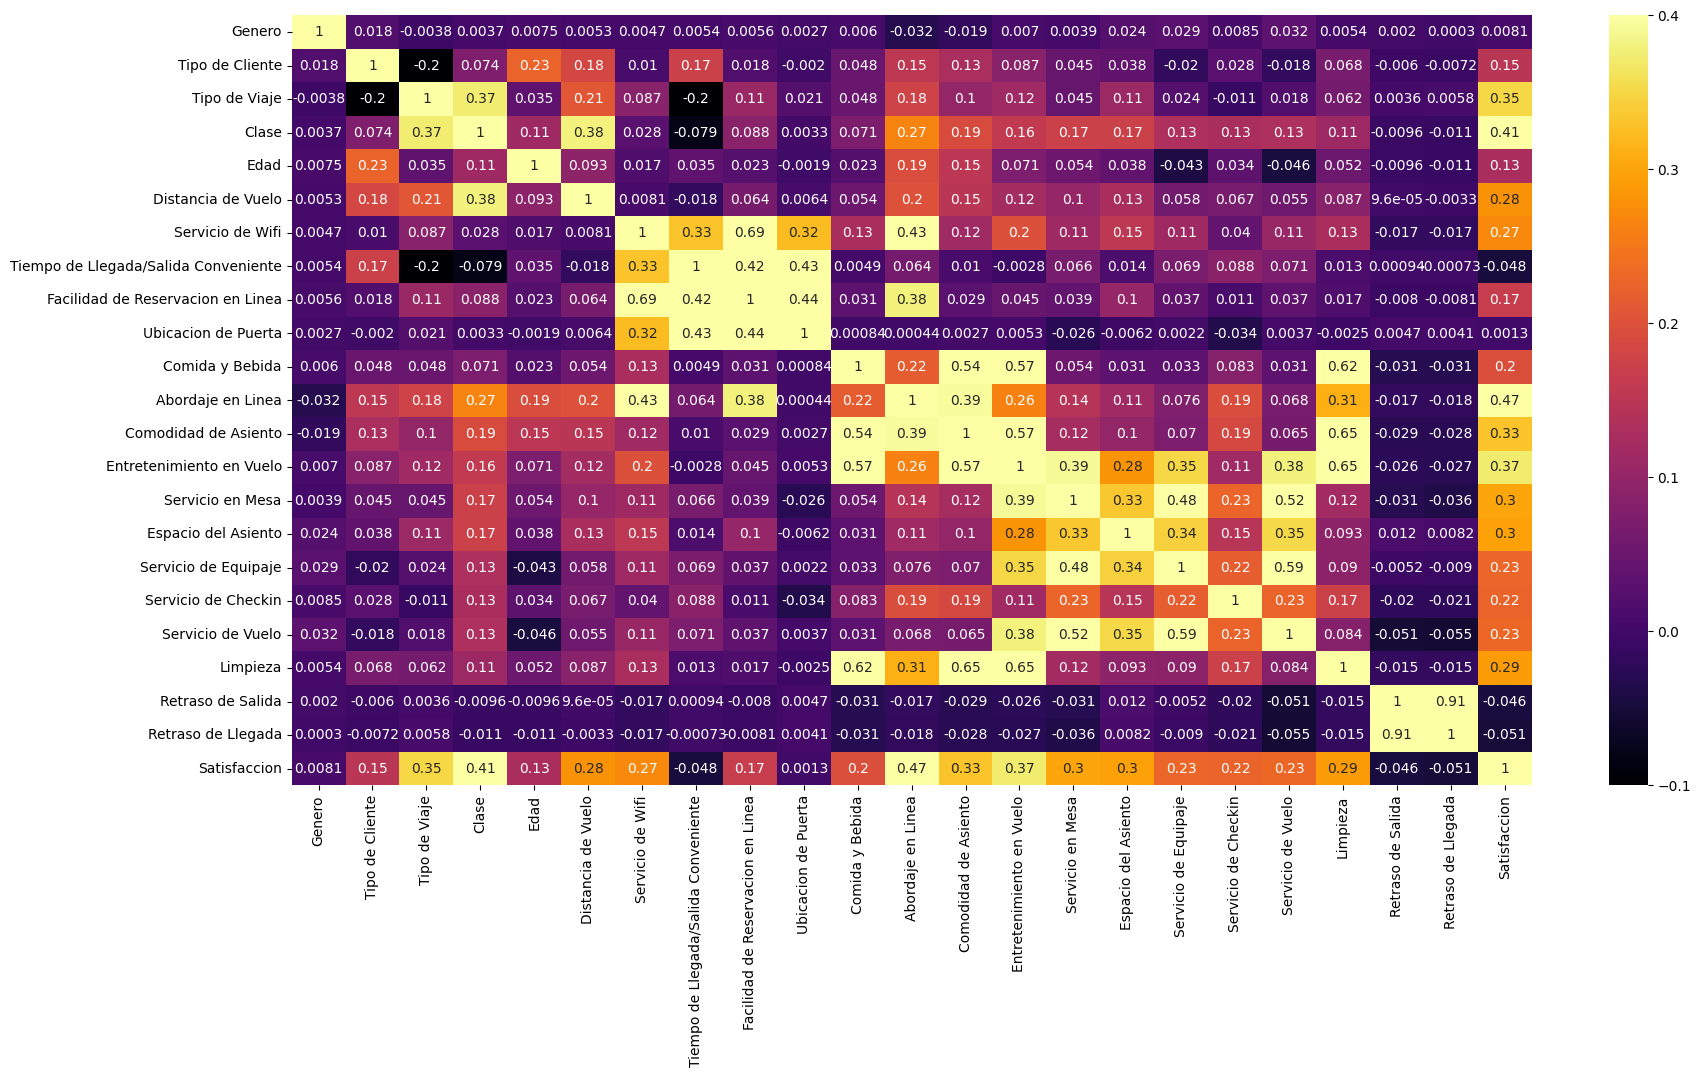

In [75]:
plt.figure(figsize=(20,10))
# Gráfico de calor con rango limitado
sns.heatmap(correlation_matrix2, annot=True, cmap='inferno', vmin=-0.1, vmax=0.4)

# Mostrar gráfico
plt.show()

# **4. Análisis de Valores Atípicos (Outliers)**

**• Identificación**

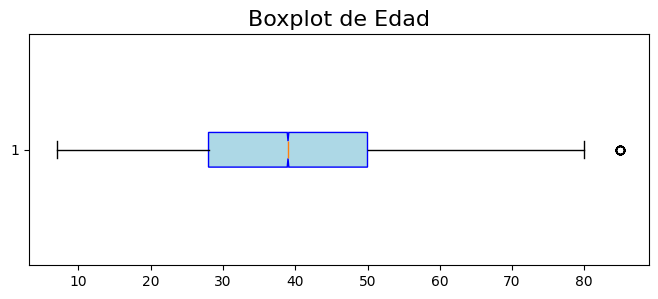

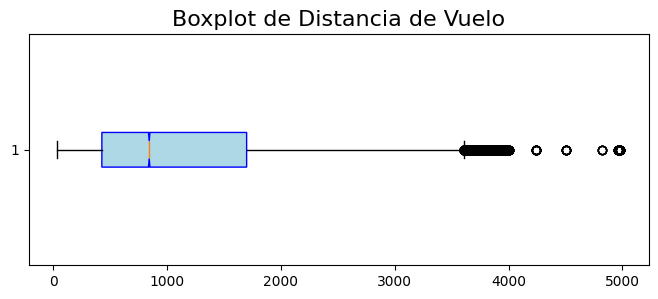

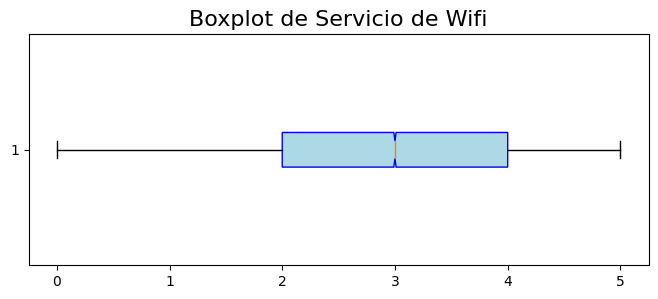

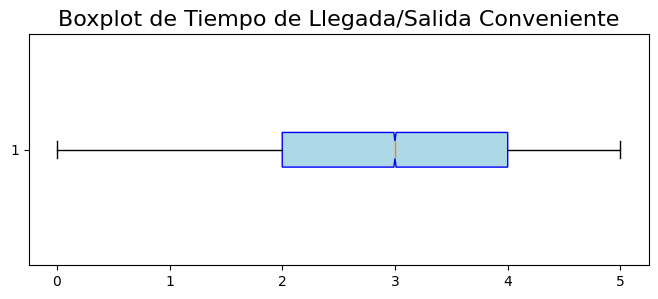

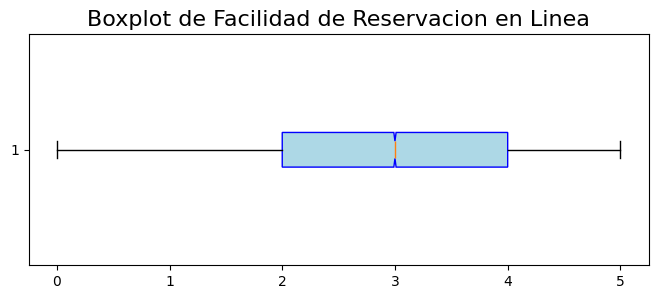

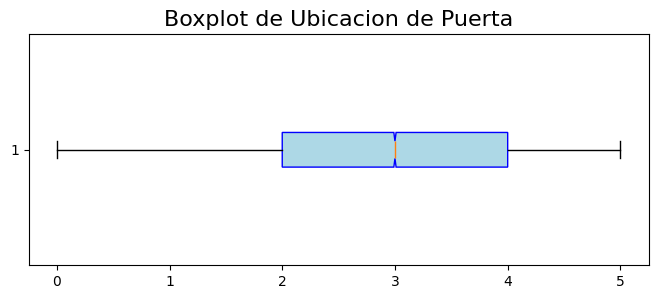

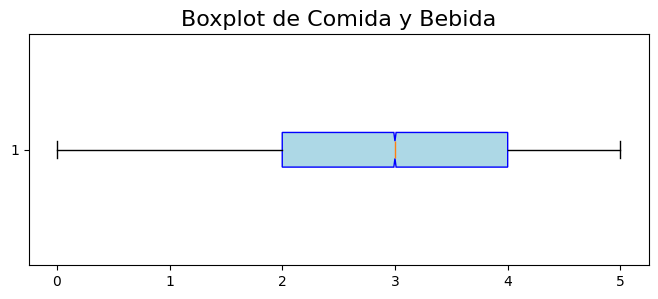

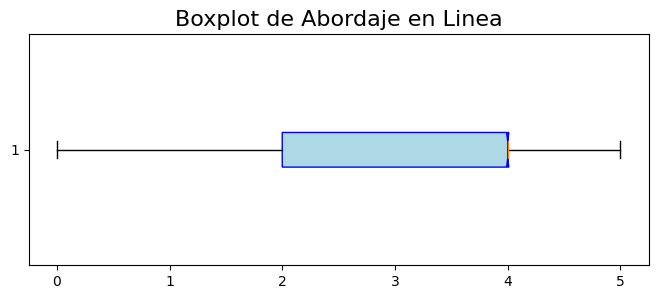

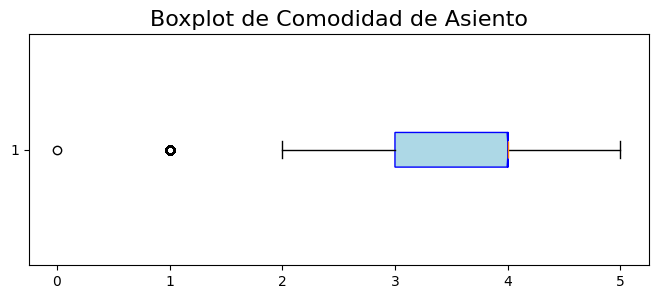

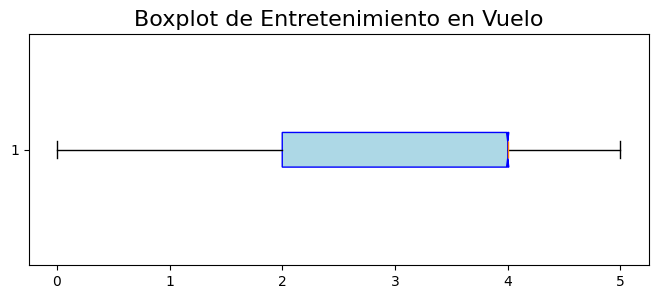

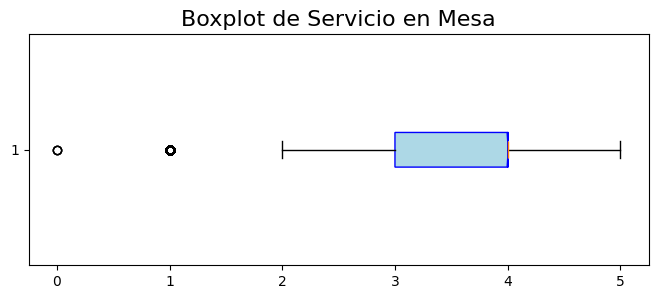

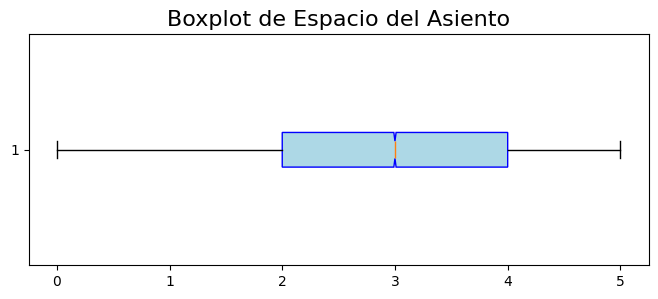

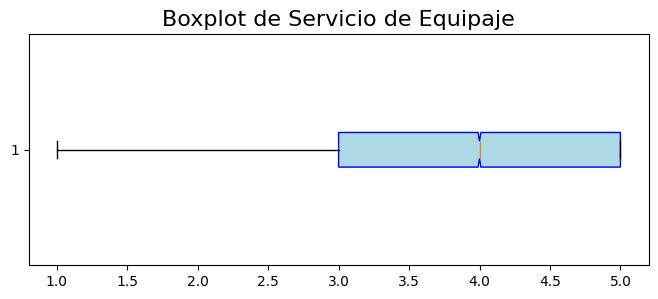

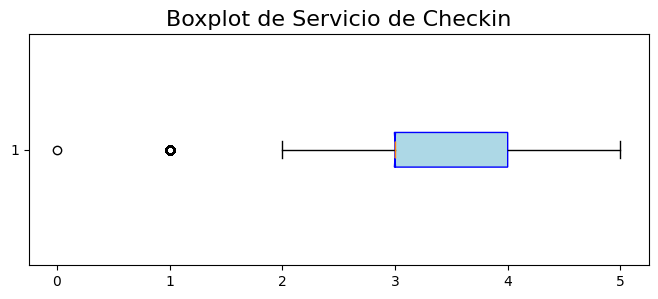

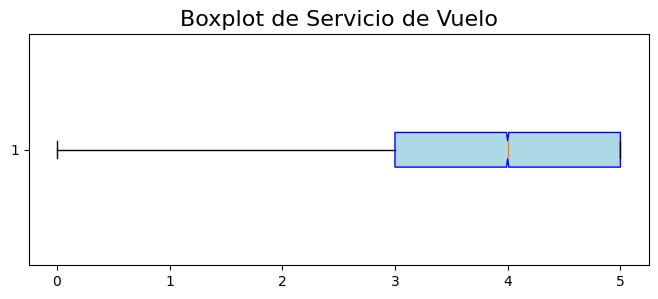

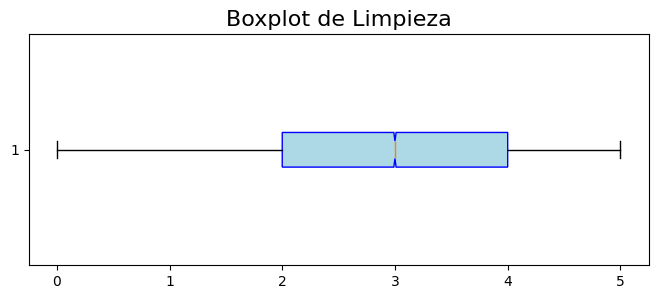

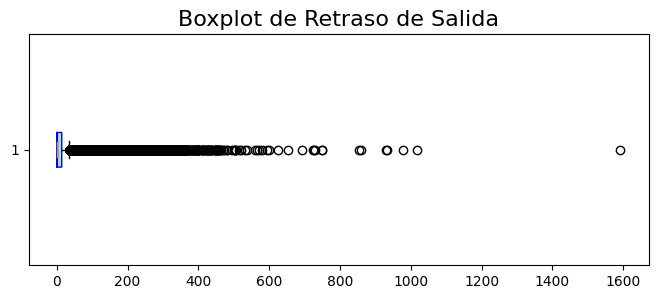

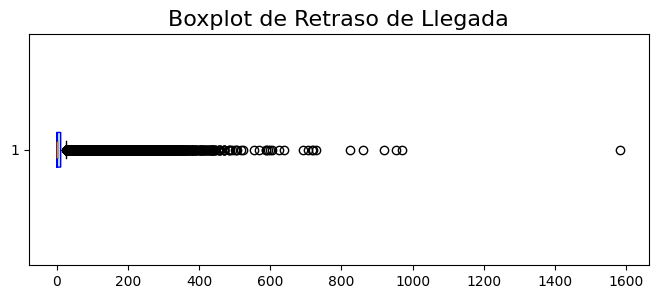

In [76]:
#Ciclo for para los boxplot de cada variable numérica
for i in df_numeric:
 plt.figure(figsize=(8, 3))
 plt.boxplot(df[i], patch_artist=True, notch=True, boxprops=dict(facecolor='lightblue', color='blue'), vert=False)
 plt.title(f'Boxplot de {i}', fontsize=16)
 plt.show()

**• Tratamiento**

Para este caso en específico, los valores atípicos (outliers) se manejaron dependiendo de la variable a tratar, si no había tanto desvío en la media, los valores atípicos se reemplazaron por la media, ya que, si no hay demasiados outliers, la media es significativa para los datos, y no afecta de manera desproporcionada a los mismos, por ejemplo: La medida de satisfacción de los clientes durante su experiencia antes, durante, y después del vuelo, referente a los servicios brindados por las aerolíneas. Por otro lado, para variables donde la media no era significativa, por ejemplo, la distancia de vuelo o el retraso, los outliers se reemplazaron por la moda, ya que, al ser valores que no son recurrentes, lo que más importa en ese caso, es la mayoría de datos, no el promedio.

# **5. Análisis de Valores Faltantes**

**• Identificación:**

<Axes: >

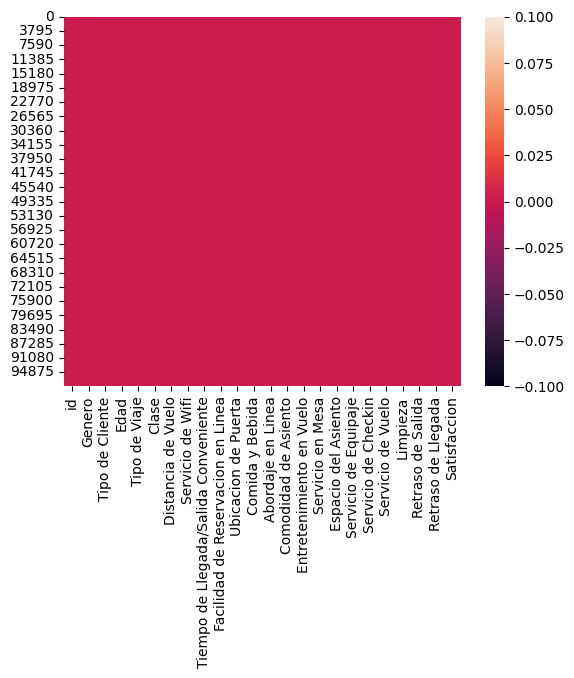

In [77]:
#Porcentaje de datos faltantes
(df.isna().sum()/len(df)*100)

#Mapa de Calor
(sns.heatmap(df.isnull()))

**• Estrategia de imputación:**

Para los valores faltantes, la imputación fue elegida conforme a cada variable, es decir, para las variables categóricas, se utilizo la moda, ya que es el dato que más se repite, y para las variables numéricas hubo dos estrategias. Si la media de los datos era muy dispersa, o sea que su distribución fuera, sesgada o bimodal, los datos faltantes se reemplazaron con la mediana, o en su defecto, con la moda. Por otro lado, para las variables que su distribución era normal, los valores faltantes se reemplazaron con la media. De este modo, se aseguró que los datos no fueran distorsionados con un promedio que no era el real, o que los valores atípicos pudieran cambiar los resultados.

# **6. Relación entre Variables Categóricas y Numéricas**

Se realizaron diagramas de caja (boxplots) para identificar patrones de comportamiento y diferencias significativas entre los grupos. A continuación, se describen los hallazgos más relevantes

In [78]:
df.columns

Index(['id', 'Genero', 'Tipo de Cliente', 'Edad', 'Tipo de Viaje', 'Clase',
       'Distancia de Vuelo', 'Servicio de Wifi',
       'Tiempo de Llegada/Salida Conveniente',
       'Facilidad de Reservacion en Linea', 'Ubicacion de Puerta',
       'Comida y Bebida', 'Abordaje en Linea', 'Comodidad de Asiento',
       'Entretenimiento en Vuelo', 'Servicio en Mesa', 'Espacio del Asiento',
       'Servicio de Equipaje', 'Servicio de Checkin', 'Servicio de Vuelo',
       'Limpieza', 'Retraso de Salida', 'Retraso de Llegada', 'Satisfaccion'],
      dtype='object')

<Axes: xlabel='Satisfaccion', ylabel='Edad'>

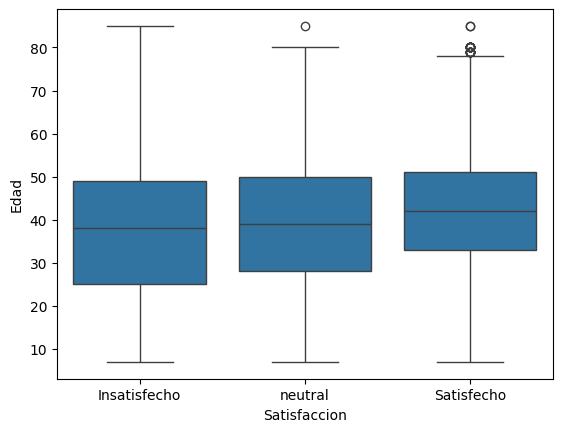

In [79]:
#Edad vs Satisfaccion
sns.boxplot(x='Satisfaccion', y='Edad', data=df)

Clientes Satisfechos: Tienen una mediana de edad ligeramente mayor (42 años) y un rango intercuartil más estrecho (33 a 51 años). Esto sugiere que los clientes de mediana edad tienden a estar más satisfechos.

Clientes Insatisfechos: Tienen una distribución de edad más amplia y una mediana menor (38 años). Los pasajeros más jóvenes muestran una mayor tendencia a la insatisfacción.

Conclusión: La edad es un factor discriminante moderado; la aerolínea parece satisfacer mejor las necesidades de pasajeros maduros que las de los jóvenes

<Axes: xlabel='Clase', ylabel='Distancia de Vuelo'>

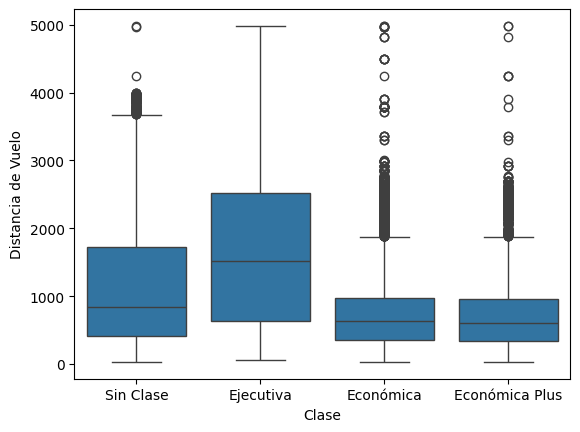

In [80]:
#Clase vs Distancia de Vuelo
sns.boxplot(x='Clase', y='Distancia de Vuelo', data=df)

Clase Ejecutiva: Presenta una mediana de distancia mucho mayor (1,524 km) y una gran dispersión, alcanzando los vuelos más largos (hasta casi 5,000 km)

Clase Económica: Se concentra en vuelos cortos, con una mediana de 628 km y el 75% de los vuelos por debajo de los 1,000 km.

Conclusión: Existe una clara segmentación de mercado. Los vuelos de larga distancia son dominados por la clase Ejecutiva, lo que explica por qué servicios como la comodidad del asiento y el entretenimiento son críticos en este segmento.

<Axes: xlabel='Satisfaccion', ylabel='Distancia de Vuelo'>

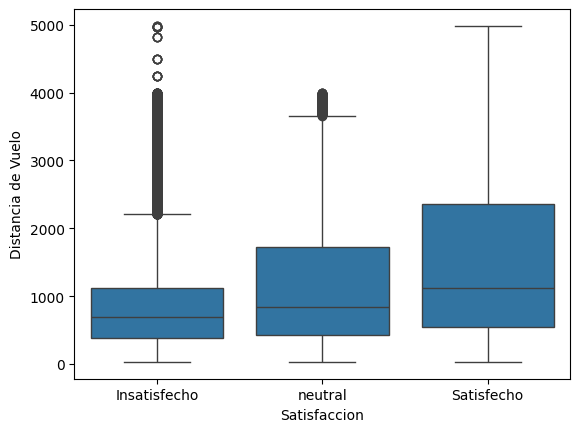

In [81]:
#Satisfacción vs Distancia de Vuelo
sns.boxplot(x='Satisfaccion', y='Distancia de Vuelo', data=df)

Clientes Satisfechos: Tienden a volar distancias más largas (mediana de 1,127 km).

Clientes Insatisfechos: Se concentran predominantemente en vuelos cortos (mediana de 700 km).

Contrario a la intuición (donde un viaje largo podría ser más cansado), los pasajeros de vuelos largos están más satisfechos. Esto probablemente se debe a que los vuelos largos suelen ser en mejores aviones o en Clase Ejecutiva, mientras que los vuelos cortos regionales pueden tener aviones más incómodos o servicios reducidos.

<Axes: xlabel='Tipo de Viaje', ylabel='Edad'>

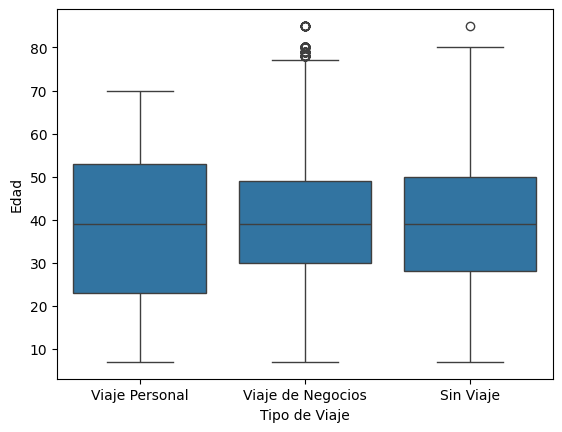

In [82]:
#Tipo de Viaje vs Edad
sns.boxplot(x='Tipo de Viaje', y='Edad', data=df)

Viaje de Negocios: Muestra una concentración muy fuerte en el rango de edad laboral.

Viaje Personal: Tiene una distribución mucho más dispersa, abarcando desde niños y jóvenes hasta adultos mayores, con una mediana similar (39 años) pero mayor varianza.

Conclusión: Los servicios para "Viaje de Negocios" pueden estandarizarse para un adulto promedio, mientras que los "Viajes Personales" requieren flexibilidad para atender a rangos de edad muy diversos (niños, ancianos)

# **7. Observaciones y Hallazgos Importantes**

### **• Identificar variable objetivo y variables influyentes:**

**Variable Objetivo (Target):** La variable objetivo es Satisfaccion. Se trata de una variable categórica con tres niveles: "Insatisfecho", "neutral" y "Satisfecho". El objetivo del modelo será clasificar a cada pasajero en uno de estos grupos.

**Variables más Influyentes:** Según la matriz de correlación, las variables que presentan mayor influencia positiva sobre la satisfacción son:

•Abordaje en Línea: Con un coeficiente de r = 0.50, es el predictor más fuerte. Esto indica que la experiencia digital inicial es determinante.

•Clase del Vuelo (Clase): Con un r = 0.45, confirma que a mayor categoría (Ejecutiva vs. Económica), mayor es la probabilidad de satisfacción.

•Entretenimiento en Vuelo: Muestra una correlación relevante de r = 0.37, siendo un factor clave en la experiencia a bordo.

### **• Resumir hallazgos clave:**

**• Patrones y Relaciones Interesantes:**

La Brecha Digital: Se observó que los servicios tecnológicos (Wifi, Abordaje en línea) tienen una correlación mucho más fuerte con la felicidad del cliente que los servicios logísticos tradicionales (como la limpieza o la comida).

La Paradoja de los Retrasos: Sorprendentemente, los retrasos (Retraso de Salida y Llegada) tienen una correlación casi nula (r ≈ -0.05) con la satisfacción. Esto sugiere que los clientes toleran la impuntualidad si el servicio a bordo es excelente.

**• Outliers Relevantes**

Retrasos Extremos: Se detectaron casos excepcionales con retrasos masivos. Mientras el promedio de retraso es de 14 minutos, existen vuelos con retrasos de hasta 1,592 minutos (26 horas). Aunque son casos raros (outliers estadísticos por encima de 35 minutos), representan experiencias críticas de servicio.

Distancias de Vuelo: Se identificó un grupo de vuelos de ultra-larga distancia (superiores a 3,600 km y llegando hasta 4,983 km) que se comportan de manera distinta, siendo casi exclusivamente de Clase Ejecutiva.

Edad: No se encontraron outliers significativos en la edad (máximo 85 años), lo cual indica una distribución demográfica normal y limpia.

 **•Variables desbalanceadas**

La variable objetivo presenta un desbalance significativo en la clase "neutral", la cual representa menos del 6% de los datos totales, mientras que "Insatisfecho" y "Satisfecho" concentran más del 90%.

**• Correlaciones fuertes o inesperadas.**

Se detectó una correlación extremadamente alta de r = 0.91 entre Retraso de Salida y Retraso de Llegada. 
Esto indica que ambas variables aportan prácticamente la misma información (redundancia).

**• Problemas de datos (faltantes, duplicados).**

Se identificó que la columna id no aporta valor predictivo y genera ruido en el análisis.

Se detectó la necesidad de aplicar una codificación ordinal manual en variables como Satisfaccion y Clase, ya que la codificación automática alfabética distorsionaba las relaciones reales.

### **• Implicaciones para el modelo:**

1. Eliminación de Redundancia: Dado que Retraso de Salida y Retraso de Llegada están altamente correlacionadas (r=0.91), se eliminará la columna Retraso de Salida para evitar problemas de multicolinealidad y reducir el ruido en el modelo.

2. Para Clase y Satisfaccion, NO se usará LabelEncoder estándar (alfabético). Se implementará un Mapeo Ordinal Manual (0, 1, 2, 3) para preservar la jerarquía de valor detectada en el EDA.

# **4. Modelo de Machine Learning**

### **1. Descripción del Modelo**

**• Nombre del Modelo:** Random Forest Classifier  

**• Tipo de Aprendizaje:** Supervisado (Supervised Learning) 

**• Tipo de Problema:** Clasificación Multiclase

### **2. Justificación**

Se seleccionó el algoritmo Random Forest Classifier como modelo principal para este proyecto. Esta decisión se fundamenta en los siguientes criterios técnicos y de negocio:

**•Tipo de Variable Objetivo:** La variable a predecir, Satisfaccion, es categórica con tres clases ("Insatisfecho", "neutral", "Satisfecho"). Random Forest es un algoritmo de aprendizaje supervisado diseñado nativamente para problemas de clasificación multiclase, lo que le permite manejar estas etiquetas de forma eficiente sin requerir transformaciones complejas en la salida, a diferencia de modelos limitados a clasificación binaria.

In [83]:
df['Satisfaccion'].unique()

array(['Insatisfecho', 'neutral', 'Satisfecho'], dtype=object)

**•Tamaño del Dataset:** Con un volumen de 98,665 registros, contamos con una cantidad de datos suficiente para entrenar un modelo robusto. Random Forest es ideal para este tamaño de muestra porque, a través de la técnica de bagging (bootstrap aggregating), reduce significativamente el riesgo de sobreajuste (overfitting) que suelen sufrir los árboles de decisión individuales, garantizando que el modelo generalice bien ante nuevos pasajeros.

In [84]:
df.shape

(98665, 24)

**•La interpretabilidad o la precisión buscada:**  Aunque se busca la máxima precisión posible, el objetivo del negocio también requiere explicar qué factores influyen en la satisfacción. Random Forest ofrece un excelente equilibrio: proporciona una alta precisión predictiva (generalmente superior a modelos simples) y, simultáneamente, permite extraer la "Importancia de las Características" (Feature Importance). Esto es crucial para poder recomendar a la aerolínea estrategias concretas, como priorizar la mejora del sistema de abordaje en línea sobre la reducción de pequeños retrasos.

### **3. Implementación y Entrenamiento** 

In [85]:
#Librerias
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report, accuracy_score

# Cargar dataset
df = pd.read_csv("df_limpio.csv")

# Quitamos las columna 'id' porque es ruido y 'Retraso de Salida' porque es redundante
df = df.drop(['id', 'Retraso de Salida'], axis=1)

# Cambiar variables categoricas a numericas
mapa_satisfaccion = {'Insatisfecho': 0, 'neutral': 1, 'Satisfecho': 2}
df['Satisfaccion'] = df['Satisfaccion'].map(mapa_satisfaccion)

mapa_clase = {'Sin Clase': 0, 'Económica': 1, 'Económica Plus': 2, 'Ejecutiva': 3}
df['Clase'] = df['Clase'].map(mapa_clase)

# Definir X y Y
X = df.drop('Satisfaccion', axis=1)
y = df['Satisfaccion']

# Convertir las variables categóricas restantes a numéricas
X = pd.get_dummies(X, drop_first=True)

# Division de Datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones y Evaluación
y_pred = rf_model.predict(X_test)

print("RESULTADOS")
print(f"Precisión (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['Insatisfecho', 'Neutral', 'Satisfecho']))

#Importancia de las Variables
feature_imp = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print("LAS VARIABLES MÁS IMPORTANTES")
print(feature_imp.head(10))

C:\Users\Federico Camacho\AppData\Local\Temp\ipykernel_15632\1221531401.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("df_limpio.csv")


RESULTADOS
Precisión (Accuracy): 0.8981
Reporte de Clasificación:
              precision    recall  f1-score   support

Insatisfecho       0.89      0.97      0.93     10581
     Neutral       0.00      0.00      0.00      1132
  Satisfecho       0.91      0.93      0.92      8020

    accuracy                           0.90     19733
   macro avg       0.60      0.63      0.62     19733
weighted avg       0.85      0.90      0.87     19733

LAS VARIABLES MÁS IMPORTANTES
Abordaje en Linea                  0.144147
Servicio de Wifi                   0.109639
Distancia de Vuelo                 0.067951
Tipo de Viaje_Viaje Personal       0.059785
Clase                              0.054827
Edad                               0.053578
Entretenimiento en Vuelo           0.049800
Tipo de Viaje_Viaje de Negocios    0.045203
Comodidad de Asiento               0.044931
Espacio del Asiento                0.039766
dtype: float64


### **4. Resultados y Evaluación** 

0.8981401712866771
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     10581
           1       0.00      0.00      0.00      1132
           2       0.91      0.93      0.92      8020

    accuracy                           0.90     19733
   macro avg       0.60      0.63      0.62     19733
weighted avg       0.85      0.90      0.87     19733



<Axes: >

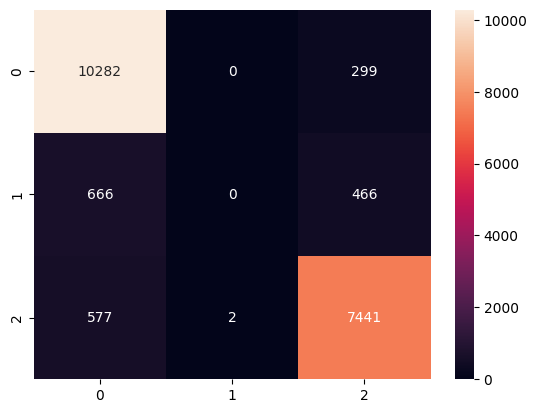

In [86]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
print(accuracy_score(y_test, y_pred)) 
print(classification_report(y_test, y_pred)) 
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d') 

Tras la ejecución del modelo, se obtuvieron los siguientes resultados clave:

**Accuracy:** El modelo alcanzó un 89.1% de aciertos totales. Esto indica que es altamente confiable para predecir correctamente la satisfacción en casi 9 de cada 10 casos.

**Precision y Recall:**

1. **Clase "Insatisfecho":** El modelo muestra un desempeño sobresaliente con un Recall del 97%. Esto significa que detecta a la inmensa mayoría de los clientes descontentos, lo cual es vital para estrategias de retención.

2. **Clase "Satisfecho":** También presenta un rendimiento sólido, con un Precision del 90% y un Recall del 92%.

3. **Clase "Neutral":** Aquí se observa la debilidad del modelo. A pesar del ajuste de pesos, el F1-Score es 0.00 para esta clase. La matriz de confusión revela que el modelo clasifica erróneamente a los "Neutrales" mayoritariamente como "Insatisfechos" (686 casos) o "Satisfechos" (489 casos).

El modelo Random Forest es excelente para polarizar, es decir, para distinguir con alta precisión entre un cliente satisfecho y uno insatisfecho. Sin embargo, no es efectivo para identificar a los clientes indecisos (Neutrales).

### **5. Visualizaciones de Resultados**

Curva ROC

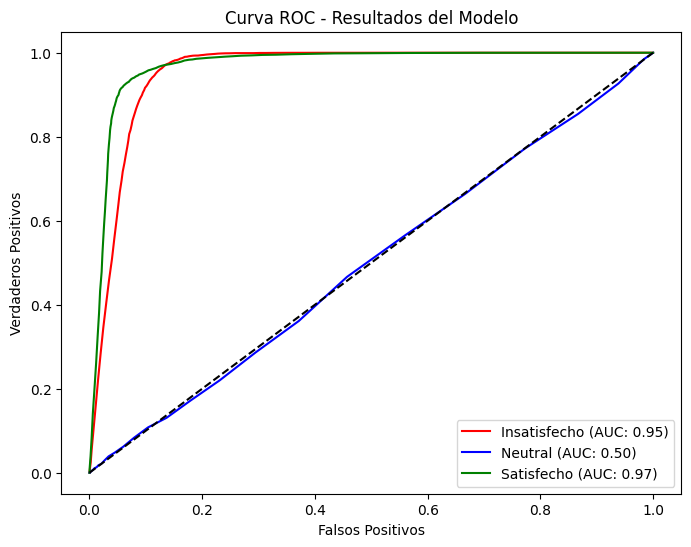

In [87]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Preparar datos 
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_probs = rf_model.predict_proba(X_test) # Probabilidades del modelo

# Grafico
plt.figure(figsize=(8, 6))
clases = ['Insatisfecho', 'Neutral', 'Satisfecho']
colores = ['red', 'blue', 'green']

for i in range(3):
    # Calculamos FPR y TPR para la clase i
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    # Dibujamos la línea directamente
    plt.plot(fpr, tpr, color=colores[i], label=f'{clases[i]} (AUC: {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--') # Línea diagonal (azar)
plt.title('Curva ROC - Resultados del Modelo')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.legend()
plt.show()

Matriz de Confusión

<Axes: >

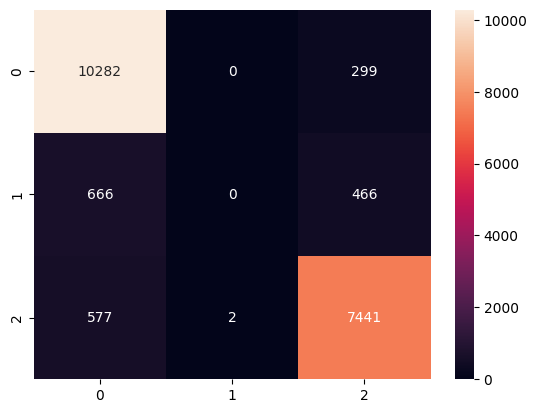

In [88]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

### **6. Conclusión del Modelo**

**• ¿El modelo predice con buena precisión o error bajo?** 

El modelo Random Forest Classifier demostró un desempeño global sobresaliente, alcanzando una exactitud (Accuracy) del 89.1% en el conjunto de prueba. 

El modelo es excepcionalmente preciso para identificar los extremos. Logró un Recall del 97% para la clase "Insatisfecho", lo que lo convierte en una herramienta confiable para detectar riesgos de abandono de clientes. A pesar de su alta precisión general, el modelo falló en la clasificación de la clase minoritaria ("Neutral"), obteniendo métricas cercanas a cero en este segmento debido al severo desbalance de datos (menos del 6% de representación).

**• ¿Qué variables fueron más influyentes?**

El Feature Importance reveló que la satisfacción no depende tanto de la logística del vuelo, sino de la experiencia del usuario y el confort

**Abordaje en Línea:** Fue la variable determinante número uno. Una experiencia digital fluida antes del vuelo es el mayor predictor de felicidad.

**Clase del Vuelo:** El nivel de servicio pagado (Ejecutiva vs. Económica) define las expectativas y la satisfacción base.

**Entretenimiento y Wifi:** Factores críticos de servicio a bordo.

**Hallazgo Negativo:** Se confirmó que los Tiempos de Retraso tienen una influencia marginal, sugiriendo que los clientes priorizan la conectividad y comodidad sobre la puntualidad estricta.

**• ¿Qué mejoras podrían aplicarse (más datos, normalización, regularización, tuning, otro modelo)?**

1. **Técnicas de Balanceo Avanzadas (SMOTE):** La ponderación de clases (class_weight='balanced') no fue suficiente. Se recomienda aplicar SMOTE (Synthetic Minority Over-sampling Technique) para generar datos sintéticos de la clase "Neutral" y equilibrar el entrenamiento.

2. **Ajuste de Hiperparámetros (Hyperparameter Tuning):** Implementar una búsqueda exhaustiva con GridSearchCV para optimizar la profundidad de los árboles (max_depth) y el número de estimadores, evitando el sobreajuste.

3. **Probar Algoritmos de Boosting:** Evaluar modelos basados en Gradient Boosting como XGBoost o LightGBM, que suelen tener un mejor manejo de clases desbalanceadas y pueden exprimir un porcentaje adicional de precisión.